In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import plotly.express as px
from sklearn.metrics import mean_squared_error


In [2]:
# Step 1: Load the dataset
data = pd.read_csv('/Users/priyankam/Documents/UTA ASSIGNMENTS/DATA VISUALIZATION/PROJECT/owid-energy-data.csv')

In [3]:
data.head()

country  year iso_code  population  gdp  biofuel_cons_change_pct  \
0  ASEAN (Ember)  2000      NaN         NaN  NaN                      NaN   
1  ASEAN (Ember)  2001      NaN         NaN  NaN                      NaN   
2  ASEAN (Ember)  2002      NaN         NaN  NaN                      NaN   
3  ASEAN (Ember)  2003      NaN         NaN  NaN                      NaN   
4  ASEAN (Ember)  2004      NaN         NaN  NaN                      NaN   

   biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
0                      NaN                      NaN                  NaN   
1                      NaN                      NaN                  NaN   
2                      NaN                      NaN                  NaN   
3                      NaN                      NaN                  NaN   
4                      NaN                      NaN                  NaN   

   biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
0                      NaN  ...               0.0                 NaN   
1                      NaN  ...               0.0                 NaN   
2                      NaN  ...               0.0                 NaN   
3                      NaN  ...               0.0                 NaN   
4                      NaN  ...               0.0                 NaN   

   wind_cons_change_pct  wind_cons_change_twh  wind_consumption  \
0                   NaN                   NaN               NaN   
1                   NaN                   NaN               NaN   
2                   NaN                   NaN               NaN   
3                   NaN                   NaN               NaN   
4                   NaN                   NaN               NaN   

   wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
0                   NaN               0.0                     NaN   
1                   NaN               0.0                     NaN   
2                   NaN               0.0                     NaN   
3                   NaN               0.0                     NaN   
4                   NaN               0.0                     NaN   

   wind_share_elec  wind_share_energy  
0              0.0                NaN  
1              0.0                NaN  
2              0.0                NaN  
3              0.0                NaN  
4              0.0                NaN  

[5 rows x 129 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21812 entries, 0 to 21811
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 21.5+ MB


In [5]:
for column, null_count in data.isnull().sum().items():
    print(f"{column} -  {null_count}")

country -  0
year -  0
iso_code -  5000
population -  3365
gdp -  10037
biofuel_cons_change_pct -  20006
biofuel_cons_change_twh -  19016
biofuel_cons_per_capita -  19412
biofuel_consumption -  18936
biofuel_elec_per_capita -  16242
biofuel_electricity -  15978
biofuel_share_elec -  16001
biofuel_share_energy -  19034
carbon_intensity_elec -  15977
coal_cons_change_pct -  16516
coal_cons_change_twh -  16398
coal_cons_per_capita -  17060
coal_consumption -  16293
coal_elec_per_capita -  15742
coal_electricity -  15127
coal_prod_change_pct -  12155
coal_prod_change_twh -  5519
coal_prod_per_capita -  7049
coal_production -  5264
coal_share_elec -  15150
coal_share_energy -  16933
electricity_demand -  15949
electricity_generation -  14401
electricity_share_energy -  17852
energy_cons_change_pct -  10092
energy_cons_change_twh -  9899
energy_per_capita -  11120
energy_per_gdp -  14023
fossil_cons_change_pct -  16859
fossil_cons_change_twh -  16859
fossil_elec_per_capita -  15699
fossil_el

In [6]:
missing_values = data.isnull().sum()
total_rows = len(data)
for column in missing_values.index:
    missing_percentage = (missing_values[column] / total_rows) * 100
    print(f"{column} - {missing_percentage:.2f}%")

country - 0.00%
year - 0.00%
iso_code - 22.92%
population - 15.43%
gdp - 46.02%
biofuel_cons_change_pct - 91.72%
biofuel_cons_change_twh - 87.18%
biofuel_cons_per_capita - 89.00%
biofuel_consumption - 86.81%
biofuel_elec_per_capita - 74.46%
biofuel_electricity - 73.25%
biofuel_share_elec - 73.36%
biofuel_share_energy - 87.26%
carbon_intensity_elec - 73.25%
coal_cons_change_pct - 75.72%
coal_cons_change_twh - 75.18%
coal_cons_per_capita - 78.21%
coal_consumption - 74.70%
coal_elec_per_capita - 72.17%
coal_electricity - 69.35%
coal_prod_change_pct - 55.73%
coal_prod_change_twh - 25.30%
coal_prod_per_capita - 32.32%
coal_production - 24.13%
coal_share_elec - 69.46%
coal_share_energy - 77.63%
electricity_demand - 73.12%
electricity_generation - 66.02%
electricity_share_energy - 81.84%
energy_cons_change_pct - 46.27%
energy_cons_change_twh - 45.38%
energy_per_capita - 50.98%
energy_per_gdp - 64.29%
fossil_cons_change_pct - 77.29%
fossil_cons_change_twh - 77.29%
fossil_elec_per_capita - 71.9

In [7]:
numerical_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(include=['object', 'category', 'bool']).columns

In [8]:
print("Numerical Columns:")
print(numerical_columns)

Numerical Columns:
Index(['year', 'population', 'gdp', 'biofuel_cons_change_pct',
       'biofuel_cons_change_twh', 'biofuel_cons_per_capita',
       'biofuel_consumption', 'biofuel_elec_per_capita', 'biofuel_electricity',
       'biofuel_share_elec',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=127)


In [9]:
print("\nCategorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['country', 'iso_code'], dtype='object')


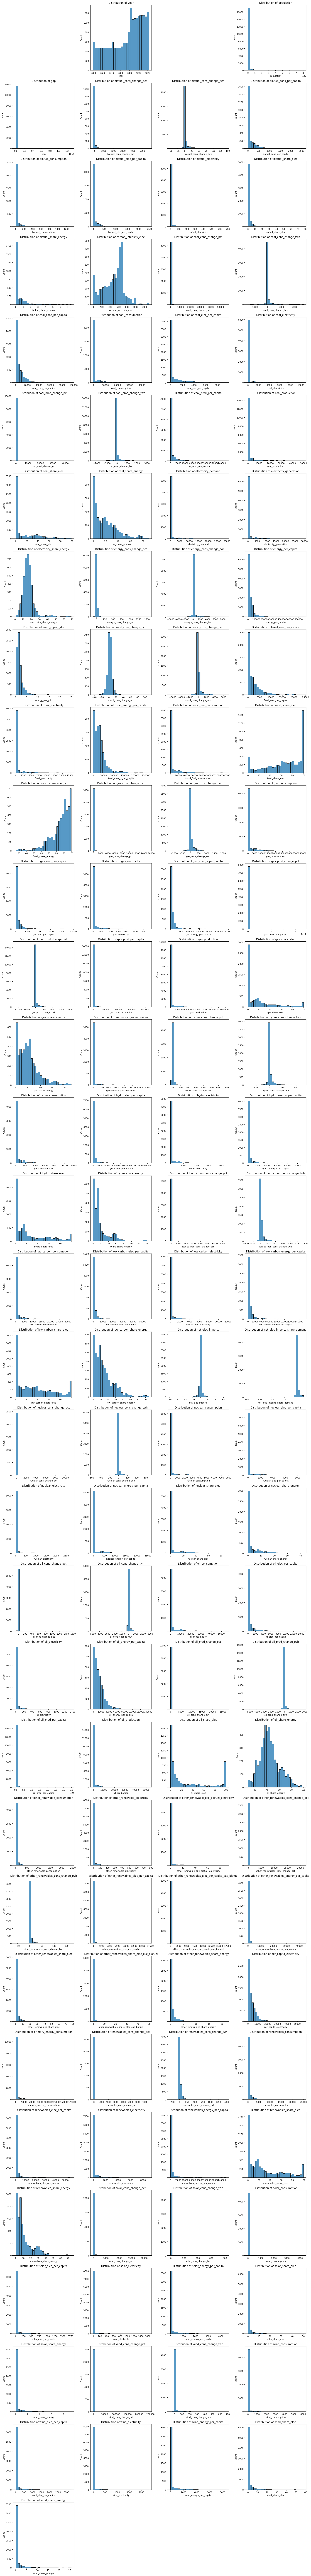

In [10]:
def plot_distributions_in_grid(df):
    n_cols = 4
    n_rows = (len(df.columns) // n_cols) + 1  
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))  
    axes = axes.flatten() 
    
    for i, col in enumerate(df.columns):
        if df[col].dtype in [np.float64, np.int64]:  
            sns.histplot(df[col].dropna(), kde=False, bins=30, ax=axes[i])
            axes[i].set_title(f"Distribution of {col}")
        else:
            axes[i].axis('off')  

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout() 
    plt.show()
plot_distributions_in_grid(data)

Skewness values for each numeric column:
year: -0.54
population: 9.00
gdp: 28.66
biofuel_cons_change_pct: 14.98
biofuel_cons_change_twh: 4.79
biofuel_cons_per_capita: 3.66
biofuel_consumption: 4.94
biofuel_elec_per_capita: 6.35
biofuel_electricity: 7.15
biofuel_share_elec: 7.43
biofuel_share_energy: 3.61
carbon_intensity_elec: -0.15
coal_cons_change_pct: 64.39
coal_cons_change_twh: 5.18
coal_cons_per_capita: 3.28
coal_consumption: 4.51
coal_elec_per_capita: 2.50
coal_electricity: 5.05
coal_prod_change_pct: 64.94
coal_prod_change_twh: 4.57
coal_prod_per_capita: 6.69
coal_production: 6.65
coal_share_elec: 1.38
coal_share_energy: 1.13
electricity_demand: 6.23
electricity_generation: 5.18
electricity_share_energy: 2.36
energy_cons_change_pct: 37.14
energy_cons_change_twh: 5.20
energy_per_capita: 4.73
energy_per_gdp: 4.64
fossil_cons_change_pct: 1.51
fossil_cons_change_twh: 2.47
fossil_elec_per_capita: 2.42
fossil_electricity: 4.96
fossil_energy_per_capita: 2.47
fossil_fuel_consumption: 4.0

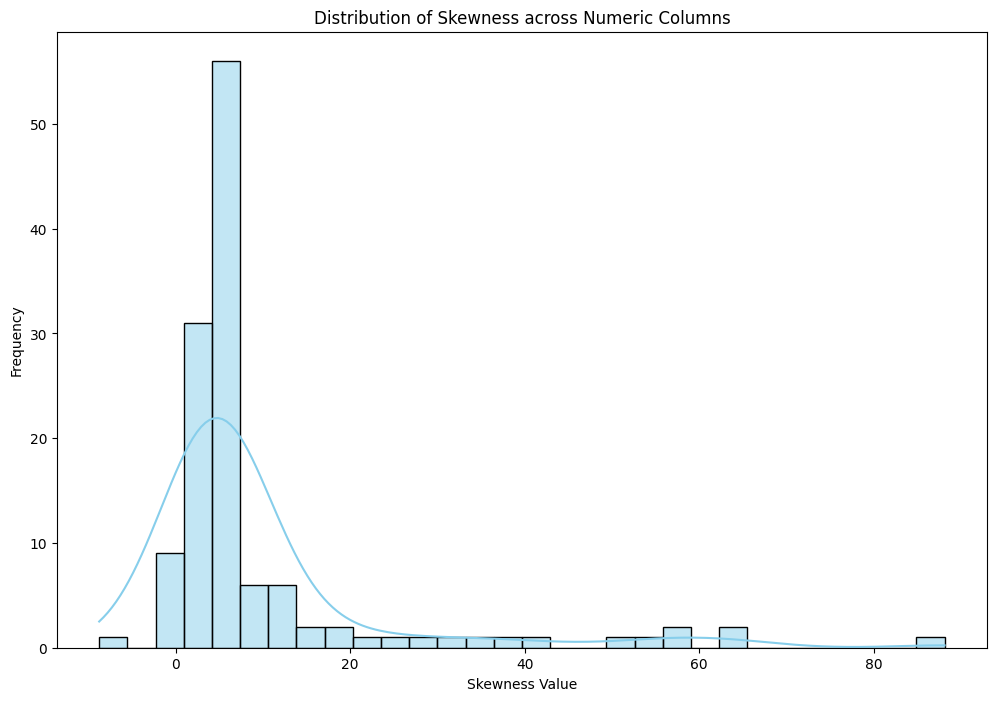

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

numeric_df = data.select_dtypes(include=['float64', 'int64'])
skewness_values = numeric_df.apply(lambda x: skew(x.dropna()), axis=0)
print("Skewness values for each numeric column:")
for column, skewness in skewness_values.items():
    print(f"{column}: {skewness:.2f}")

plt.figure(figsize=(12, 8))
sns.histplot(skewness_values, bins=30, kde=True, color="skyblue")
plt.title("Distribution of Skewness across Numeric Columns")
plt.xlabel("Skewness Value")
plt.ylabel("Frequency")
plt.show()


In [12]:

eda_copy_df = data.copy()

missing_values = eda_copy_df.isnull().sum()
total_rows = len(eda_copy_df)

columns_to_drop = missing_values[missing_values / total_rows > 0.80].index

eda_copy_df.drop(columns=columns_to_drop, inplace=True)

print("\nDropped columns due to over 80% missing values:")
print(columns_to_drop)

missing_values_after_drop = eda_copy_df.isnull().sum()

print("\nMissing percentage after dropping columns:")
for column in missing_values_after_drop.index:
    missing_percentage = (missing_values_after_drop[column] / total_rows) * 100
    print(f"{column} - {missing_percentage:.2f}%")

print("\nRemaining columns after dropping:")
print(eda_copy_df.columns)



Dropped columns due to over 80% missing values:
Index(['biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_share_energy', 'electricity_share_energy',
       'fossil_energy_per_capita', 'nuclear_cons_change_pct',
       'other_renewables_cons_change_pct', 'solar_cons_change_pct',
       'solar_energy_per_capita', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_energy_per_capita', 'wind_share_energy'],
      dtype='object')

Missing percentage after dropping columns:
country - 0.00%
year - 0.00%
iso_code - 22.92%
population - 15.43%
gdp - 46.02%
biofuel_elec_per_capita - 74.46%
biofuel_electricity - 73.25%
biofuel_share_elec - 73.36%
carbon_intensity_elec - 73.25%
coal_cons_change_pct - 75.72%
coal_cons_change_twh - 75.18%
coal_cons_per_capita - 78.21%
coal_consumption - 74.70%
coal_elec_per_capita - 72.17%
coal_electricity - 69.35%
coal_prod_change_pct - 55.73%
coal_prod_change_twh - 25.30%
coal_prod_

In [13]:
missing_values = eda_copy_df.isnull().sum()
total_rows = len(eda_copy_df)
for column in missing_values.index:
    missing_percentage = (missing_values[column] / total_rows) * 100    
    print(f"{column} - {missing_percentage:.2f}%")

country - 0.00%
year - 0.00%
iso_code - 22.92%
population - 15.43%
gdp - 46.02%
biofuel_elec_per_capita - 74.46%
biofuel_electricity - 73.25%
biofuel_share_elec - 73.36%
carbon_intensity_elec - 73.25%
coal_cons_change_pct - 75.72%
coal_cons_change_twh - 75.18%
coal_cons_per_capita - 78.21%
coal_consumption - 74.70%
coal_elec_per_capita - 72.17%
coal_electricity - 69.35%
coal_prod_change_pct - 55.73%
coal_prod_change_twh - 25.30%
coal_prod_per_capita - 32.32%
coal_production - 24.13%
coal_share_elec - 69.46%
coal_share_energy - 77.63%
electricity_demand - 73.12%
electricity_generation - 66.02%
energy_cons_change_pct - 46.27%
energy_cons_change_twh - 45.38%
energy_per_capita - 50.98%
energy_per_gdp - 64.29%
fossil_cons_change_pct - 77.29%
fossil_cons_change_twh - 77.29%
fossil_elec_per_capita - 71.97%
fossil_electricity - 69.15%
fossil_fuel_consumption - 76.81%
fossil_share_elec - 69.28%
fossil_share_energy - 77.63%
gas_cons_change_pct - 76.40%
gas_cons_change_twh - 76.12%
gas_consumptio

In [14]:
numeric_df = eda_copy_df.select_dtypes(include=['float64', 'int64'])

skewness_values = numeric_df.apply(lambda x: skew(x.dropna()), axis=0)
missing_values = numeric_df.isnull().sum()
total_rows = len(numeric_df)
print("Skewness and Missing Values for each numeric column:")
for column in skewness_values.index:
    skewness = skewness_values[column]
    missing_percentage = (missing_values[column] / total_rows) * 100
    print(f"{column}: Skewness = {skewness:.2f}, Missing = {missing_percentage:.2f}%")



Skewness and Missing Values for each numeric column:
year: Skewness = -0.54, Missing = 0.00%
population: Skewness = 9.00, Missing = 15.43%
gdp: Skewness = 28.66, Missing = 46.02%
biofuel_elec_per_capita: Skewness = 6.35, Missing = 74.46%
biofuel_electricity: Skewness = 7.15, Missing = 73.25%
biofuel_share_elec: Skewness = 7.43, Missing = 73.36%
carbon_intensity_elec: Skewness = -0.15, Missing = 73.25%
coal_cons_change_pct: Skewness = 64.39, Missing = 75.72%
coal_cons_change_twh: Skewness = 5.18, Missing = 75.18%
coal_cons_per_capita: Skewness = 3.28, Missing = 78.21%
coal_consumption: Skewness = 4.51, Missing = 74.70%
coal_elec_per_capita: Skewness = 2.50, Missing = 72.17%
coal_electricity: Skewness = 5.05, Missing = 69.35%
coal_prod_change_pct: Skewness = 64.94, Missing = 55.73%
coal_prod_change_twh: Skewness = 4.57, Missing = 25.30%
coal_prod_per_capita: Skewness = 6.69, Missing = 32.32%
coal_production: Skewness = 6.65, Missing = 24.13%
coal_share_elec: Skewness = 1.38, Missing = 69

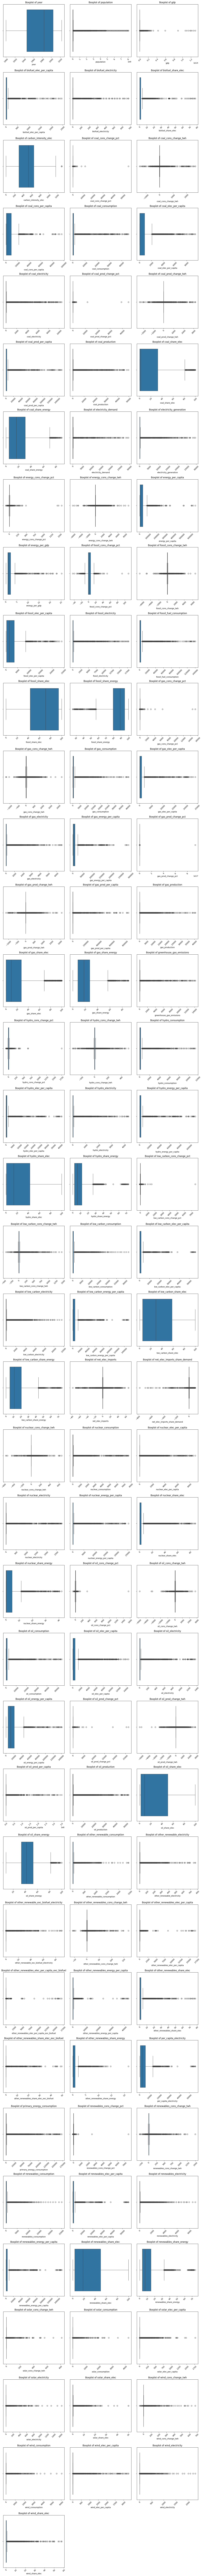

In [15]:
numeric_cols = eda_copy_df.select_dtypes(include=['float64', 'int64']).columns
num_cols = 3
num_rows = int(np.ceil(len(numeric_cols) / num_cols))  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for idx, column in enumerate(numeric_cols):
    sns.boxplot(ax=axes[idx], data=eda_copy_df, x=column)
    axes[idx].set_title(f'Boxplot of {column}')
    axes[idx].tick_params(axis='x', rotation=45)

for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


In [16]:
cols_to_impute = eda_copy_df.columns[eda_copy_df.isnull().mean() > 0.50]
eda_copy_df[cols_to_impute] = eda_copy_df[cols_to_impute].apply(lambda x: x.fillna(x.median()))
print(eda_copy_df.isnull().sum())

country                     0
year                        0
iso_code                 5000
population               3365
gdp                     10037
                        ...  
wind_cons_change_twh        0
wind_consumption            0
wind_elec_per_capita        0
wind_electricity            0
wind_share_elec             0
Length: 114, dtype: int64


In [17]:
missing_values = eda_copy_df.isnull().sum()
total_rows = len(eda_copy_df)
for column in missing_values.index:
    missing_percentage = (missing_values[column] / total_rows) * 100
    if missing_percentage != 0:
        print(f"{column} - {missing_percentage:.2f}%")

iso_code - 22.92%
population - 15.43%
gdp - 46.02%
coal_prod_change_twh - 25.30%
coal_prod_per_capita - 32.32%
coal_production - 24.13%
energy_cons_change_pct - 46.27%
energy_cons_change_twh - 45.38%
gas_prod_change_twh - 23.97%
gas_prod_per_capita - 31.44%
gas_production - 22.80%
oil_prod_change_twh - 21.04%
oil_prod_per_capita - 29.25%
oil_production - 19.86%
primary_energy_consumption - 44.17%


In [18]:
eda_copy_df.isnull().sum()

country                     0
year                        0
iso_code                 5000
population               3365
gdp                     10037
                        ...  
wind_cons_change_twh        0
wind_consumption            0
wind_elec_per_capita        0
wind_electricity            0
wind_share_elec             0
Length: 114, dtype: int64

In [19]:
import pandas as pd
from sklearn.impute import KNNImputer

missing_values = eda_copy_df.isnull().sum()
total_rows = len(eda_copy_df)


columns_with_missing_values = [column for column in missing_values.index if (missing_values[column] / total_rows) > 0]


numerical_cols_with_missing = eda_copy_df[columns_with_missing_values].select_dtypes(include=['float64', 'int64']).columns

knn_imputer = KNNImputer(n_neighbors=5)  
eda_copy_df[numerical_cols_with_missing] = knn_imputer.fit_transform(eda_copy_df[numerical_cols_with_missing])


print(eda_copy_df.isnull().sum())


country                    0
year                       0
iso_code                5000
population                 0
gdp                        0
                        ... 
wind_cons_change_twh       0
wind_consumption           0
wind_elec_per_capita       0
wind_electricity           0
wind_share_elec            0
Length: 114, dtype: int64


In [20]:
missing_values = eda_copy_df.isnull().sum()
total_rows = len(eda_copy_df)
for column in missing_values.index:
    missing_percentage = (missing_values[column] / total_rows) * 100
    print(f"{column} - {missing_percentage:.2f}%")

country - 0.00%
year - 0.00%
iso_code - 22.92%
population - 0.00%
gdp - 0.00%
biofuel_elec_per_capita - 0.00%
biofuel_electricity - 0.00%
biofuel_share_elec - 0.00%
carbon_intensity_elec - 0.00%
coal_cons_change_pct - 0.00%
coal_cons_change_twh - 0.00%
coal_cons_per_capita - 0.00%
coal_consumption - 0.00%
coal_elec_per_capita - 0.00%
coal_electricity - 0.00%
coal_prod_change_pct - 0.00%
coal_prod_change_twh - 0.00%
coal_prod_per_capita - 0.00%
coal_production - 0.00%
coal_share_elec - 0.00%
coal_share_energy - 0.00%
electricity_demand - 0.00%
electricity_generation - 0.00%
energy_cons_change_pct - 0.00%
energy_cons_change_twh - 0.00%
energy_per_capita - 0.00%
energy_per_gdp - 0.00%
fossil_cons_change_pct - 0.00%
fossil_cons_change_twh - 0.00%
fossil_elec_per_capita - 0.00%
fossil_electricity - 0.00%
fossil_fuel_consumption - 0.00%
fossil_share_elec - 0.00%
fossil_share_energy - 0.00%
gas_cons_change_pct - 0.00%
gas_cons_change_twh - 0.00%
gas_consumption - 0.00%
gas_elec_per_capita - 0

/var/folders/5v/1f87_8ss0z3_1vz8yv1kv37w0000gn/T/ipykernel_1301/1886444821.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=eda_copy_df, x='gdp', y='renewables_consumption', ax=axes[0], palette='viridis')
/var/folders/5v/1f87_8ss0z3_1vz8yv1kv37w0000gn/T/ipykernel_1301/1886444821.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=eda_copy_df, x='gdp', y='electricity_demand', ax=axes[1], palette='viridis')
/var/folders/5v/1f87_8ss0z3_1vz8yv1kv37w0000gn/T/ipykernel_1301/1886444821.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=eda_copy_df, x='renewables_consumption', y='electricity_demand', ax=axes[2], palette='viridis')


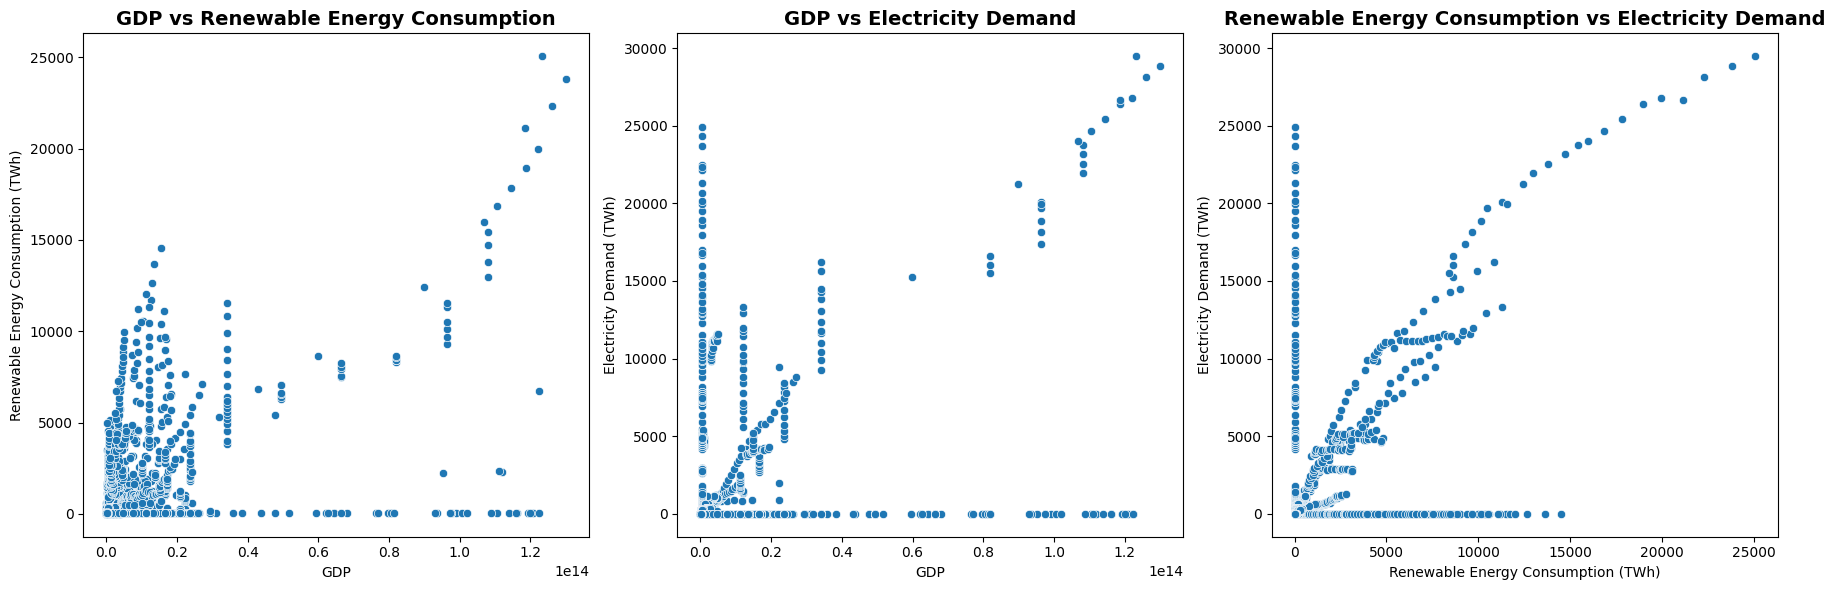

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for GDP vs Renewable Energy Consumption
sns.scatterplot(data=eda_copy_df, x='gdp', y='renewables_consumption', ax=axes[0], palette='viridis')
axes[0].set_title('GDP vs Renewable Energy Consumption', fontsize=14, weight='bold')
axes[0].set_xlabel('GDP')
axes[0].set_ylabel('Renewable Energy Consumption (TWh)')

# Scatter plot for GDP vs Electricity Demand
sns.scatterplot(data=eda_copy_df, x='gdp', y='electricity_demand', ax=axes[1], palette='viridis')
axes[1].set_title('GDP vs Electricity Demand', fontsize=14, weight='bold')
axes[1].set_xlabel('GDP')
axes[1].set_ylabel('Electricity Demand (TWh)')

# Scatter plot for Renewable Energy Consumption vs Electricity Demand
sns.scatterplot(data=eda_copy_df, x='renewables_consumption', y='electricity_demand', ax=axes[2], palette='viridis')
axes[2].set_title('Renewable Energy Consumption vs Electricity Demand', fontsize=14, weight='bold')
axes[2].set_xlabel('Renewable Energy Consumption (TWh)')
axes[2].set_ylabel('Electricity Demand (TWh)')

plt.tight_layout()
plt.show()


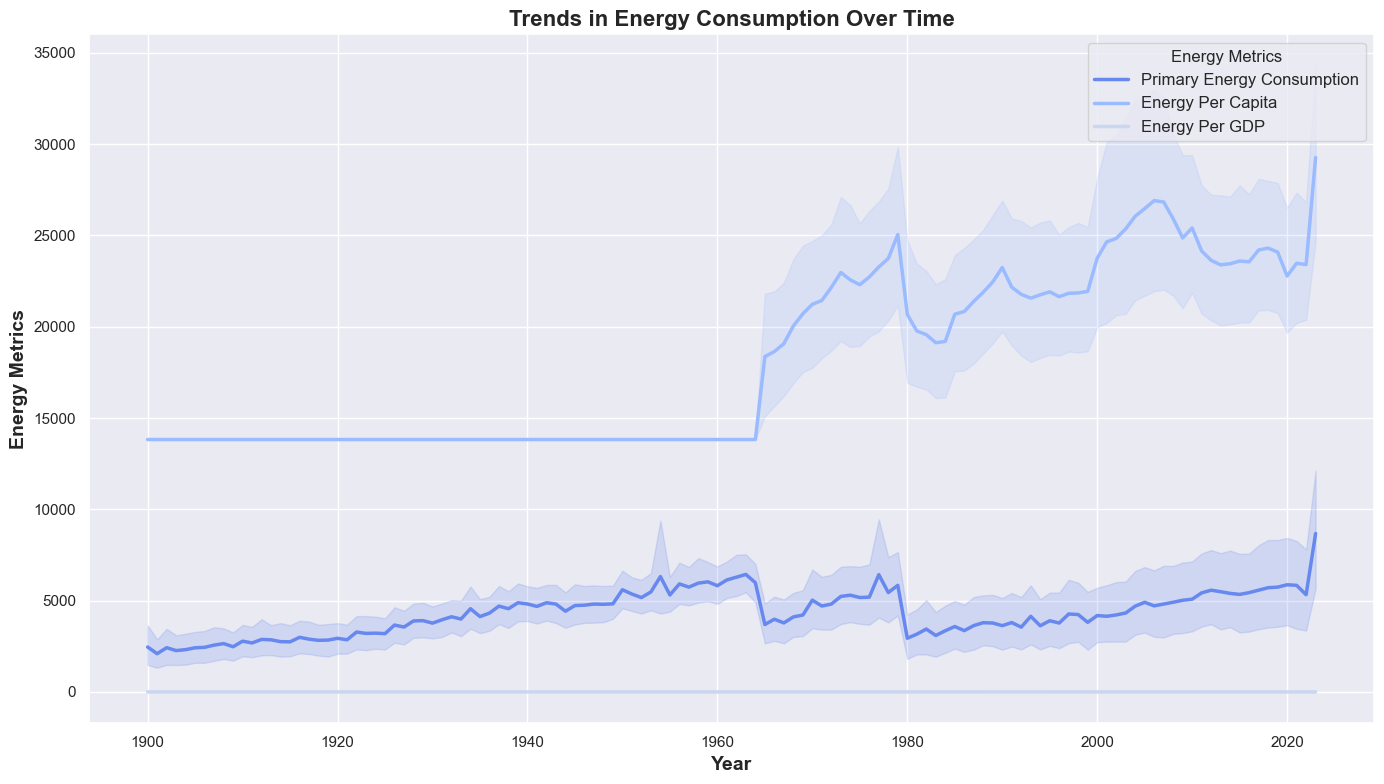

/var/folders/5v/1f87_8ss0z3_1vz8yv1kv37w0000gn/T/ipykernel_1301/3609128807.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_copy_df[energy_sources].fillna(0, inplace=True)  # Fill NaN values for visualization


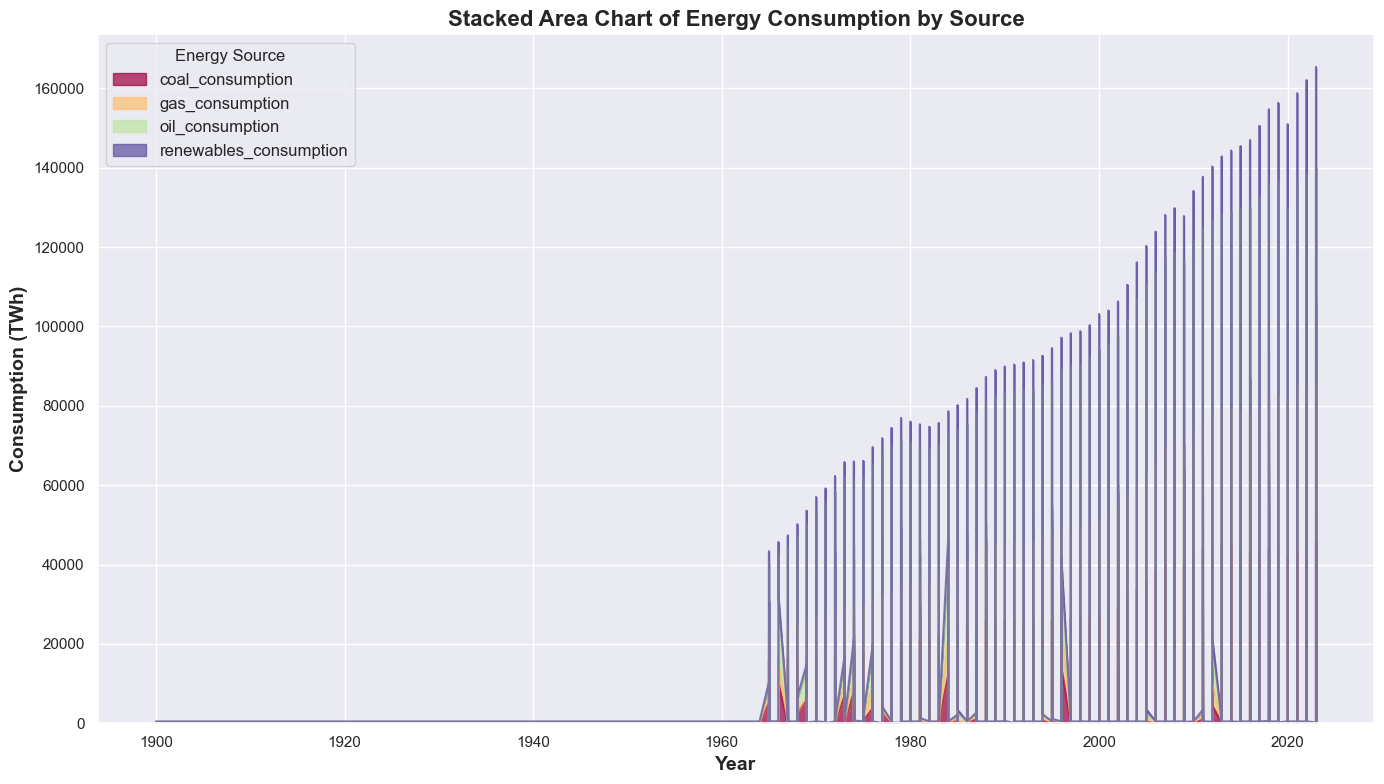

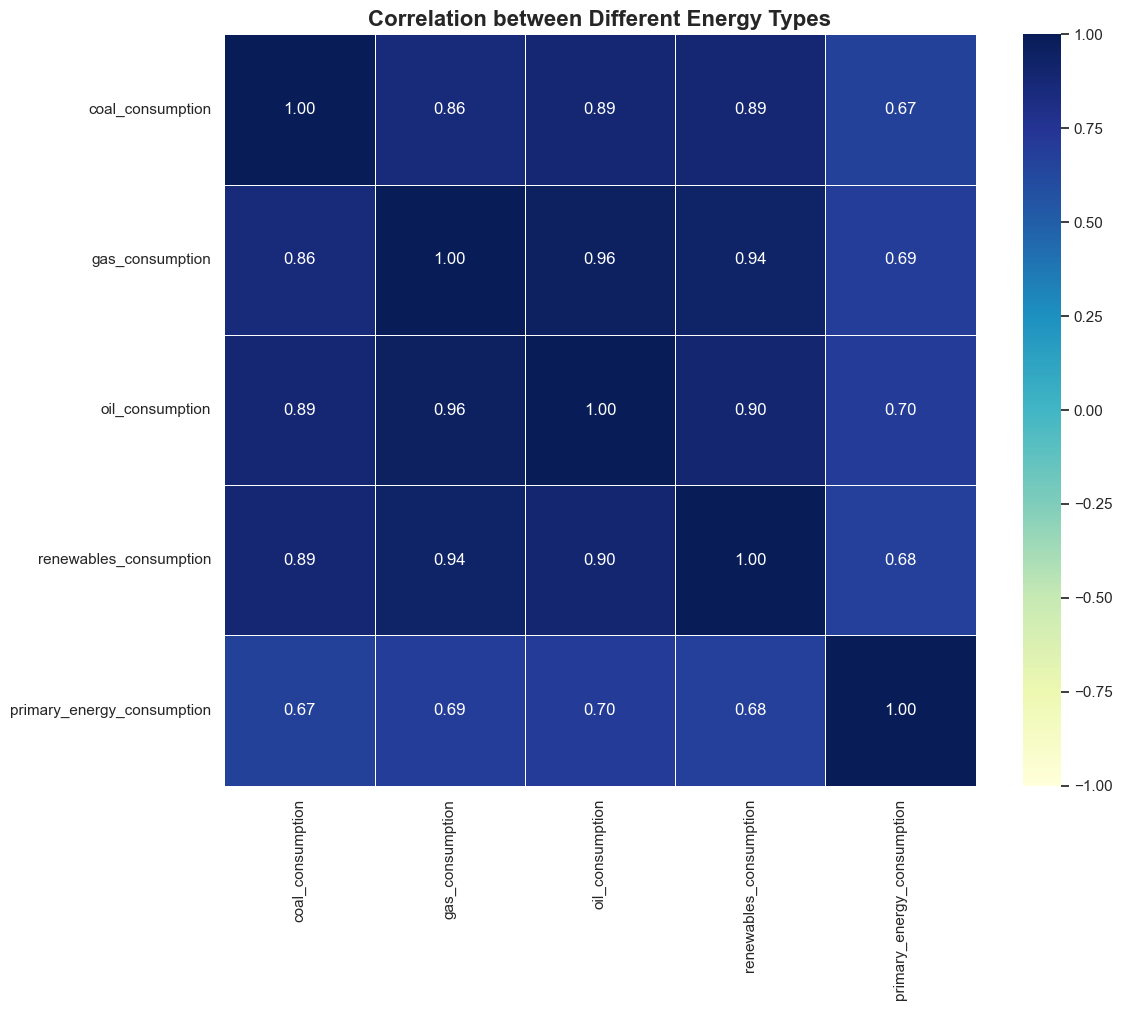

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because

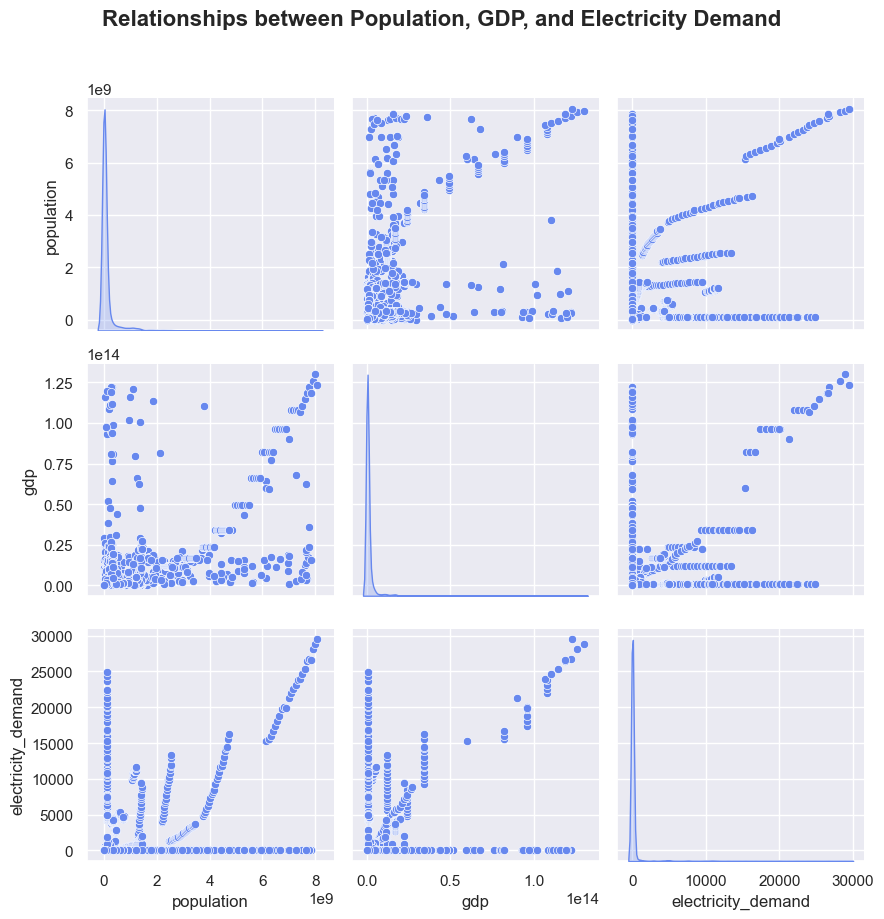

/var/folders/5v/1f87_8ss0z3_1vz8yv1kv37w0000gn/T/ipykernel_1301/3609128807.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='year', y='coal_consumption', data=eda_copy_df, inner="quart", palette="coolwarm", linewidth=2)


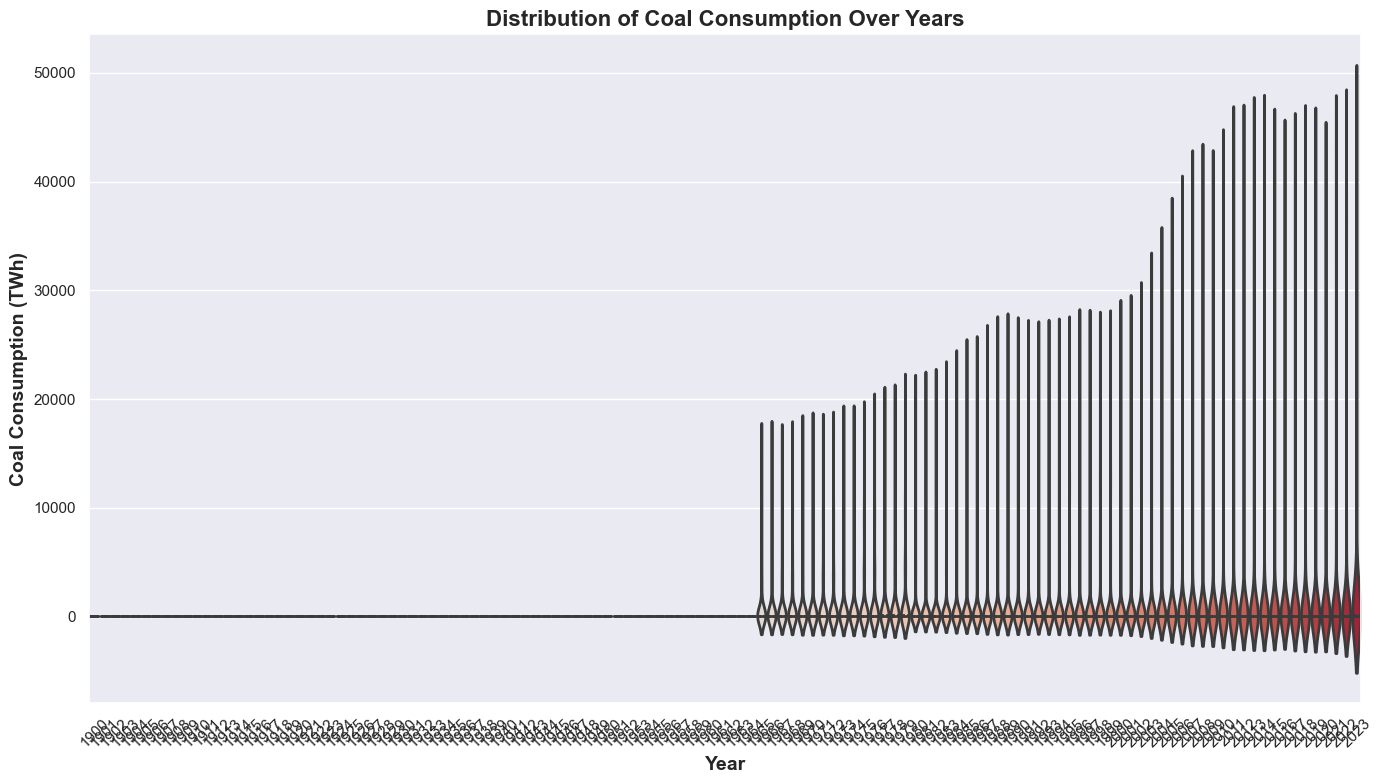

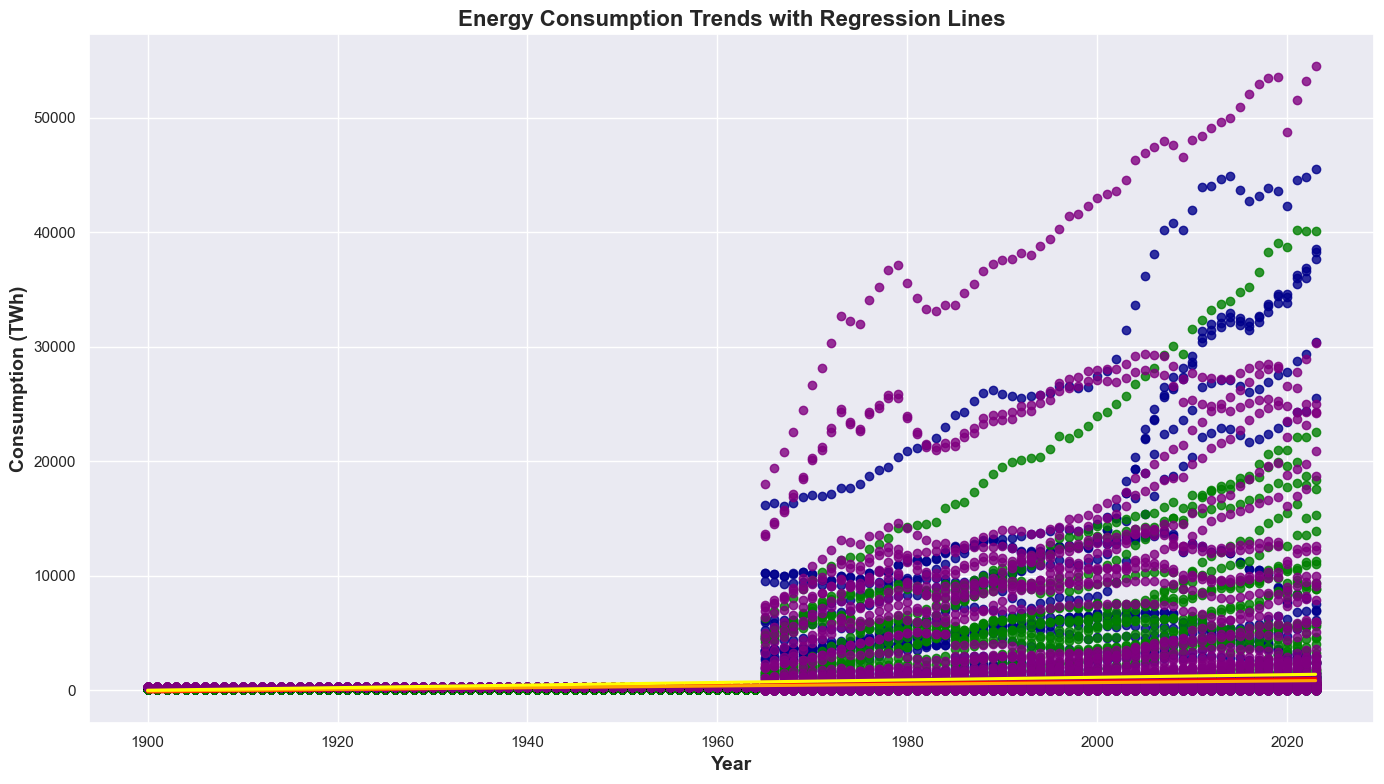

In [22]:
plt.style.use('dark_background')
sns.set_theme(style="darkgrid", palette="coolwarm")

palette = sns.color_palette("coolwarm", as_cmap=True)
eda_copy_df = eda_copy_df.dropna(subset=['year']).sort_values(by='year')  

# 1. Energy Consumption Analysis 

plt.figure(figsize=(14, 8))
sns.lineplot(data=eda_copy_df, x='year', y='primary_energy_consumption', label='Primary Energy Consumption', linewidth=2.5)
sns.lineplot(data=eda_copy_df, x='year', y='energy_per_capita', label='Energy Per Capita', linewidth=2.5)
sns.lineplot(data=eda_copy_df, x='year', y='energy_per_gdp', label='Energy Per GDP', linewidth=2.5)
plt.xlabel('Year', fontsize=14, weight='bold')
plt.ylabel('Energy Metrics', fontsize=14, weight='bold')
plt.title('Trends in Energy Consumption Over Time', fontsize=16, weight='bold')
plt.legend(title="Energy Metrics", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Stacked Area Plot for various energy consumption types (with gradients for a more attractive look)
energy_sources = ['coal_consumption', 'gas_consumption', 'oil_consumption', 'renewables_consumption']
eda_copy_df[energy_sources].fillna(0, inplace=True)  # Fill NaN values for visualization

# Creating a stacked area plot with gradient fill
fig, ax = plt.subplots(figsize=(14, 8))
eda_copy_df.set_index('year')[energy_sources].plot(kind='area', stacked=True, ax=ax, cmap='Spectral', alpha=0.7)
plt.xlabel('Year', fontsize=14, weight='bold')
plt.ylabel('Consumption (TWh)', fontsize=14, weight='bold')
plt.title('Stacked Area Chart of Energy Consumption by Source', fontsize=16, weight='bold')
plt.legend(title="Energy Source", fontsize=12)
plt.tight_layout()
plt.show()

# Correlation Heatmap with custom annotations and better color scaling
plt.figure(figsize=(12, 10))
sns.heatmap(eda_copy_df[energy_sources + ['primary_energy_consumption']].corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, vmin=-1, vmax=1, square=True)
plt.title("Correlation between Different Energy Types", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

# Pair Plot with KDE (Kernel Density Estimation) and a custom palette for population, GDP, and electricity demand
sns.pairplot(eda_copy_df, vars=['population', 'gdp', 'electricity_demand'], diag_kind='kde', palette="viridis", height=3)
plt.suptitle("Relationships between Population, GDP, and Electricity Demand", y=1.02, fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

# Violin Plot for distribution of energy consumption by source over the years
plt.figure(figsize=(14, 8))
sns.violinplot(x='year', y='coal_consumption', data=eda_copy_df, inner="quart", palette="coolwarm", linewidth=2)
plt.title('Distribution of Coal Consumption Over Years', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14, weight='bold')
plt.ylabel('Coal Consumption (TWh)', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Customizing the Energy Consumption by Source over time with trendlines
plt.figure(figsize=(14, 8))
sns.regplot(data=eda_copy_df, x='year', y='coal_consumption', scatter_kws={'color': 'darkblue'}, line_kws={'color': 'red'}, ci=None)
sns.regplot(data=eda_copy_df, x='year', y='gas_consumption', scatter_kws={'color': 'green'}, line_kws={'color': 'orange'}, ci=None)
sns.regplot(data=eda_copy_df, x='year', y='oil_consumption', scatter_kws={'color': 'purple'}, line_kws={'color': 'yellow'}, ci=None)
plt.title('Energy Consumption Trends with Regression Lines', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14, weight='bold')
plt.ylabel('Consumption (TWh)', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


In [23]:
energy_sources = ['coal_consumption', 'gas_consumption', 'oil_consumption', 'renewables_consumption', 'nuclear_consumption']

energy_data = eda_copy_df[energy_sources].mean().reset_index()
energy_data.columns = ['Energy Source', 'Consumption']

fig = px.bar(
    energy_data,
    x='Energy Source',
    y='Consumption',
    text='Consumption', 
    title="Comparative Energy Consumption by Source",
    color='Energy Source',
    color_discrete_sequence=px.colors.sequential.Oranges  
)


fig.update_layout(
    paper_bgcolor="black",  
    plot_bgcolor="black",   
    font=dict(color="white"),  
    title=dict(
        text="<b>Comparative Energy Consumption by Source</b>", 
        font=dict(size=20, color="white"),  
        x=0.5
    )
)

fig.update_xaxes(title_text="Energy Source", tickangle=45, color="white")
fig.update_yaxes(title_text="Energy Consumption (TWh or relevant unit)", color="white")

fig.update_traces(
    texttemplate='%{text:.2f}',  
    textposition='inside', 
    marker=dict(line=dict(color='white', width=1))  
)
fig.show()


In [24]:
energy_mix = {
    "Renewable Energy": eda_copy_df["renewables_consumption"].sum(),
    "Non-Renewable Energy": eda_copy_df["fossil_fuel_consumption"].sum()
}

fig = px.pie(names=list(energy_mix.keys()), values=list(energy_mix.values()),
             title="Renewable vs Non-Renewable Energy Consumption", hole=0.3) 


fig.show()

In [25]:
import plotly.express as px
column_to_use = 'region' if 'region' in eda_copy_df.columns else 'country'
region_data = eda_copy_df.groupby(column_to_use).agg({
    'carbon_intensity_elec': 'mean'
}).reset_index()

# Choropleth map
fig = px.choropleth(
    region_data,
    locations=column_to_use,  
    color="carbon_intensity_elec",  
    hover_name=column_to_use,  
    color_continuous_scale="Viridis",  
    labels={"carbon_intensity_elec": "Carbon Intensity (gCO2/kWh)"},
    title=f"Carbon Intensity by {column_to_use.capitalize()} (Choropleth Map)",
    locationmode='country names'  
)

fig.update_geos(
    showcoastlines=True,
    coastlinecolor="White",  
    projection_type="equirectangular"  
)

fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font=dict(size=20, color='white'),
    geo=dict(bgcolor='black')  
)

fig.show()


In [26]:
import plotly.express as px

fig = px.treemap(
    region_data, 
    path=[column_to_use], 
    values="carbon_intensity_elec", 
    color="carbon_intensity_elec", 
    color_continuous_scale="Viridis",
    title=f"Carbon Intensity by {column_to_use.capitalize()} (Treemap)"
)

fig.update_layout(
    paper_bgcolor="black", 
    plot_bgcolor="black",   
    font=dict(color="white"),  
    title=dict(
        text=f"<b>Carbon Intensity by {column_to_use.capitalize()} (Treemap)</b>",  
        font=dict(size=20, color="white"),  
        x=0.5
    )
)

fig.add_annotation(
    text="Topic: Carbon Intensity Across Regions",
    xref="paper", yref="paper",
    x=0.5, y=-0.1,
    showarrow=False,
    font=dict(size=14, color="white")
)

fig.show()


In [27]:
import plotly.express as px

plot_eda = eda_copy_df.copy()

top_renewable = plot_eda[['country', 'renewables_consumption']].sort_values(by='renewables_consumption', ascending=False).drop_duplicates('country').head(10)

top_non_renewable = plot_eda[['country', 'fossil_fuel_consumption']].sort_values(by='fossil_fuel_consumption', ascending=False).drop_duplicates('country').head(10)

fig1 = px.bar(top_renewable, x='country', y='renewables_consumption',
              color='renewables_consumption', title="Top 10 Countries by Renewable Energy Consumption",
              color_continuous_scale="Viridis")
              
fig1.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font=dict(size=20, color='white'),
    xaxis=dict(color='white'),
    yaxis=dict(color='white')
)

fig2 = px.bar(top_non_renewable, x='country', y='fossil_fuel_consumption',
              color='fossil_fuel_consumption', title="Top 10 Countries by Non-Renewable Energy Consumption",
              color_continuous_scale="Cividis")

fig2.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font=dict(size=20, color='white'),
    xaxis=dict(color='white'),
    yaxis=dict(color='white')
)

fig1.show()
fig2.show()


In [28]:
fig = px.scatter(eda_copy_df, x="gdp", y="primary_energy_consumption", 
                 hover_name="country", size="population", 
                 title="Energy Consumption vs GDP by Country")
fig.update_traces(marker=dict(size=12, opacity=0.6, line=dict(width=2, color='DarkSlateGrey')))
fig.update_layout(title="Energy Consumption vs GDP (Scatter Plot)", 
                  xaxis_title="GDP", yaxis_title="Energy Consumption (TWh)", showlegend=True)
fig.show()


In [29]:
fig = px.line(
    eda_copy_df, 
    x='year', 
    y='primary_energy_consumption', 
    title="Energy Consumption Trend Over Time"
)

fig.update_layout(
    xaxis_title="Year", 
    yaxis_title="Energy Consumption (TWh)",
    paper_bgcolor="black",  
    plot_bgcolor="black",   
    font=dict(color="white"),  
    xaxis=dict(title=dict(font=dict(color="white")), tickfont=dict(color="white")),
    yaxis=dict(title=dict(font=dict(color="white")), tickfont=dict(color="white"))
)

fig.show()


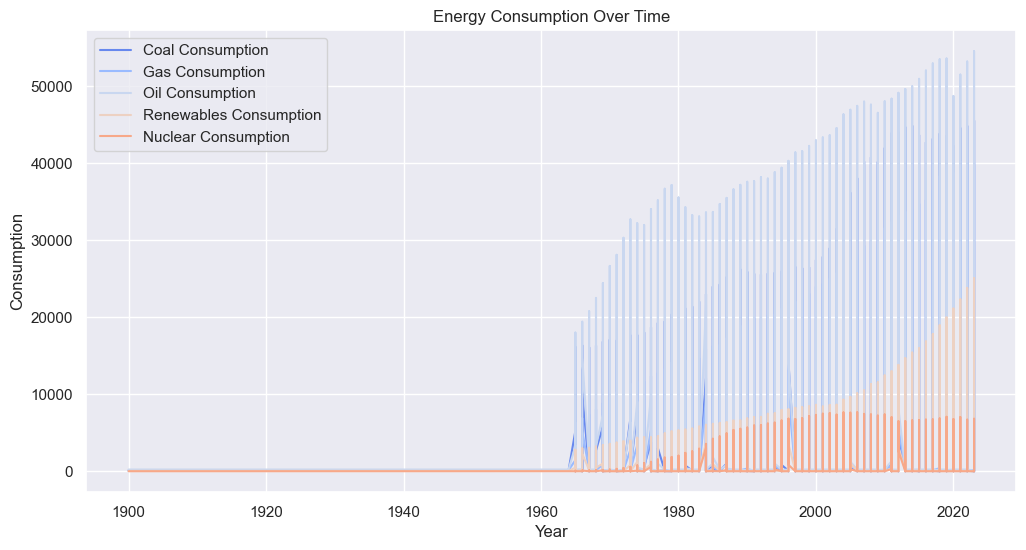

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(eda_copy_df['year'], eda_copy_df['coal_consumption'], label="Coal Consumption")
plt.plot(eda_copy_df['year'], eda_copy_df['gas_consumption'], label="Gas Consumption")
plt.plot(eda_copy_df['year'], eda_copy_df['oil_consumption'], label="Oil Consumption")
plt.plot(eda_copy_df['year'], eda_copy_df['renewables_consumption'], label="Renewables Consumption")
plt.plot(eda_copy_df['year'], eda_copy_df['nuclear_consumption'], label="Nuclear Consumption")
plt.title('Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.legend()
plt.show()


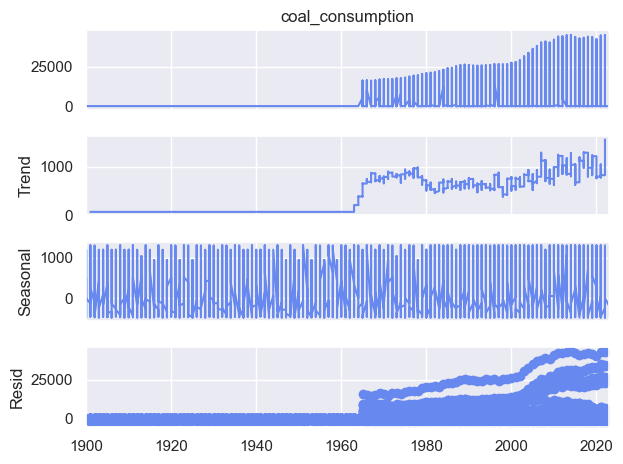

In [31]:
import statsmodels.api as sm
eda_copy_df.set_index('year', inplace=True)

decomposition = sm.tsa.seasonal_decompose(eda_copy_df['coal_consumption'], model='additive', period=365)

decomposition.plot()
plt.show()


In [34]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(eda_copy_df['coal_consumption'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] < 0.05:
    print("The series is stationary, no trend present.")
else:
    print("The series has a trend.")


ADF Statistic: -15.864785349647928
p-value: 9.124372376740125e-29
The series is stationary, no trend present.


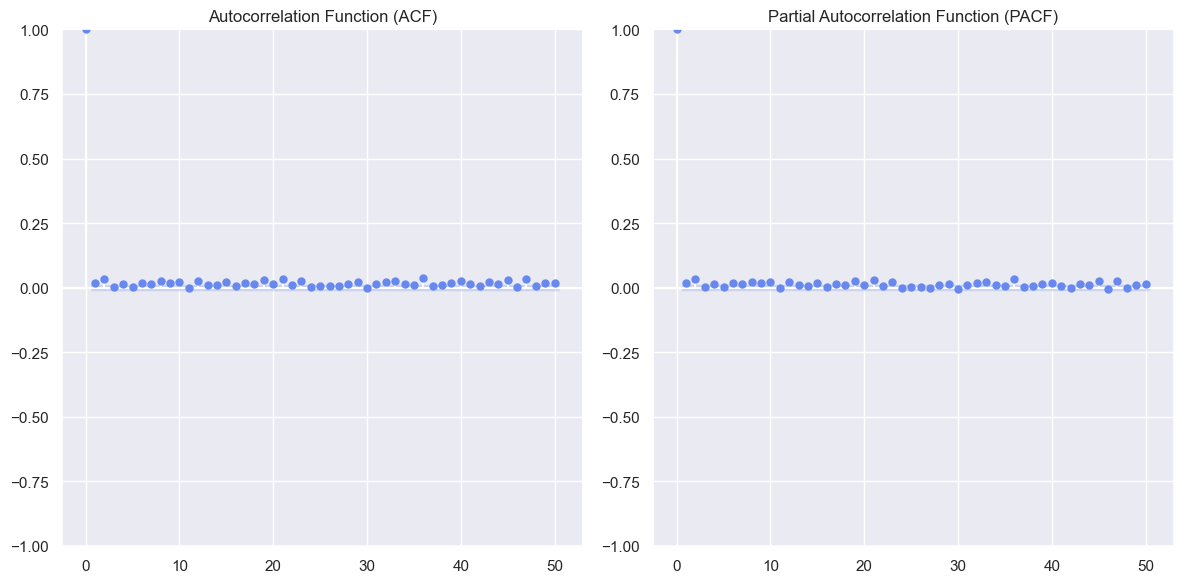

In [37]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting ACF and PACF
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(eda_copy_df['coal_consumption'], lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(eda_copy_df['coal_consumption'], lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


ADF TEST

Index(['country', 'iso_code', 'population', 'gdp', 'biofuel_elec_per_capita',
       'biofuel_electricity', 'biofuel_share_elec', 'carbon_intensity_elec',
       'coal_cons_change_pct', 'coal_cons_change_twh',
       ...
       'solar_cons_change_twh', 'solar_consumption', 'solar_elec_per_capita',
       'solar_electricity', 'solar_share_elec', 'wind_cons_change_twh',
       'wind_consumption', 'wind_elec_per_capita', 'wind_electricity',
       'wind_share_elec'],
      dtype='object', length=113)
Int64Index([1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='year', length=21812)


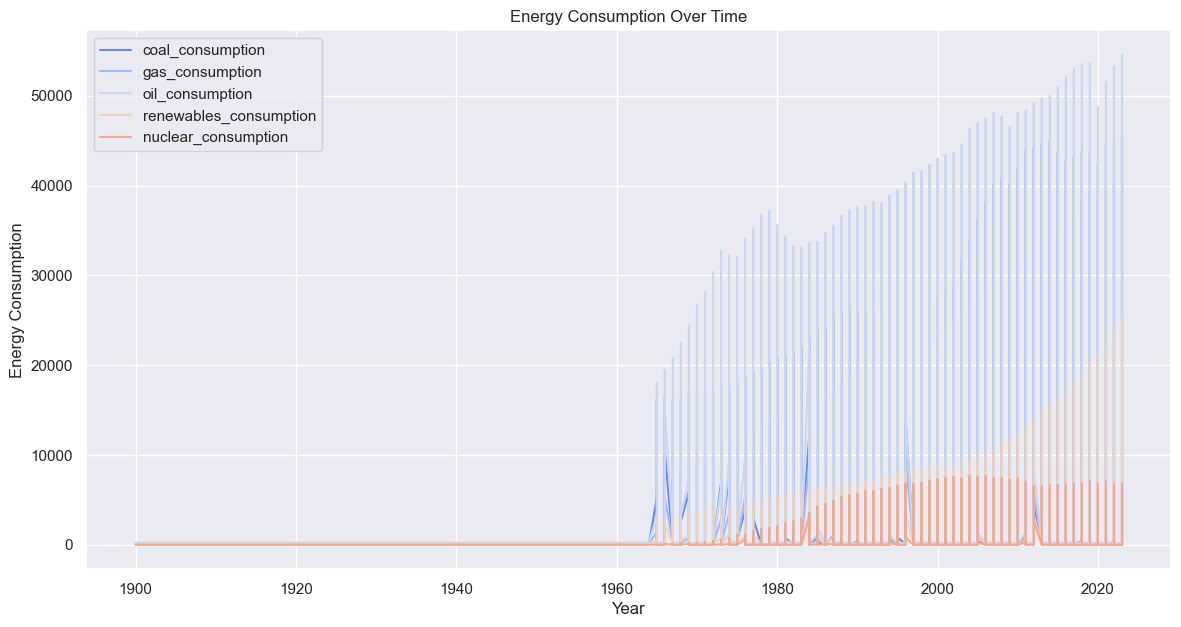

ADF Statistic for coal_consumption: -15.864785349647928
p-value for coal_consumption: 9.124372376740125e-29
coal_consumption is stationary.
ADF Statistic for gas_consumption: -15.651496983197886
p-value for gas_consumption: 1.594406894712292e-28
gas_consumption is stationary.
ADF Statistic for oil_consumption: -16.223307319193495
p-value for oil_consumption: 3.8778590852088616e-29
oil_consumption is stationary.
ADF Statistic for renewables_consumption: -14.233415743738718
p-value for renewables_consumption: 1.582199296269716e-26
renewables_consumption is stationary.
ADF Statistic for nuclear_consumption: -19.81879894171547
p-value for nuclear_consumption: 0.0
nuclear_consumption is stationary.


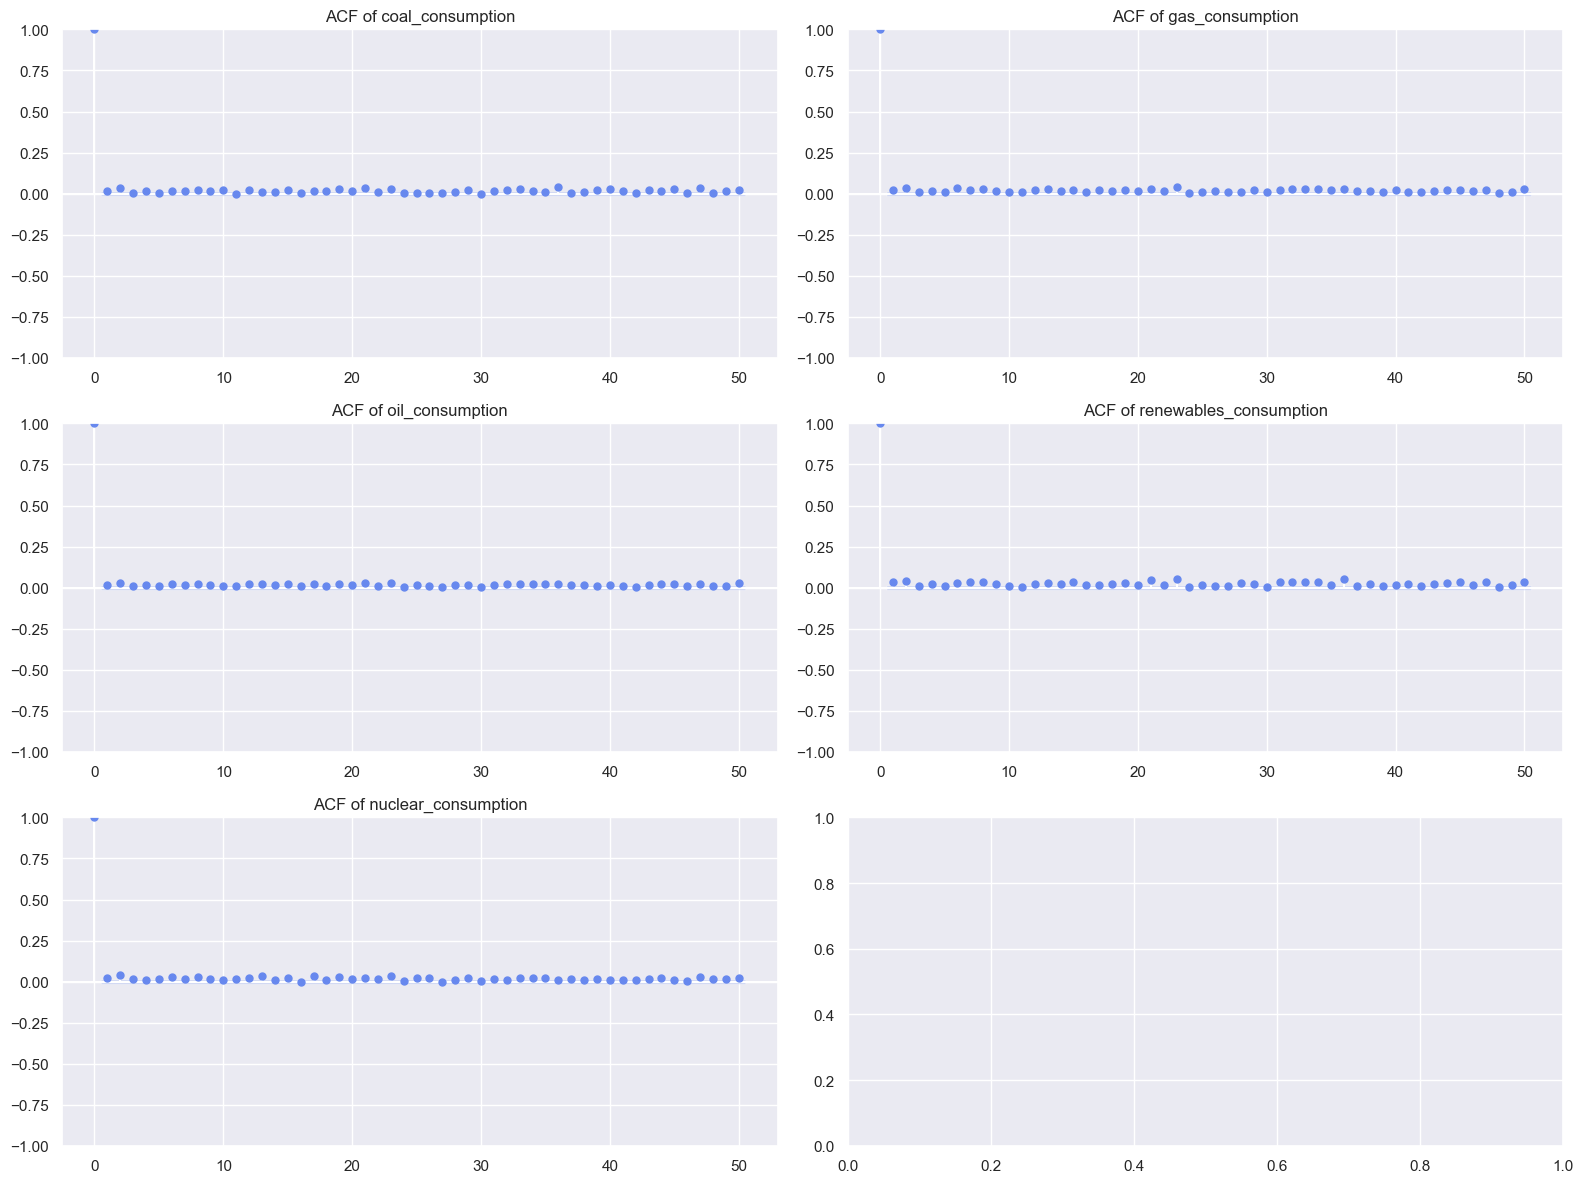

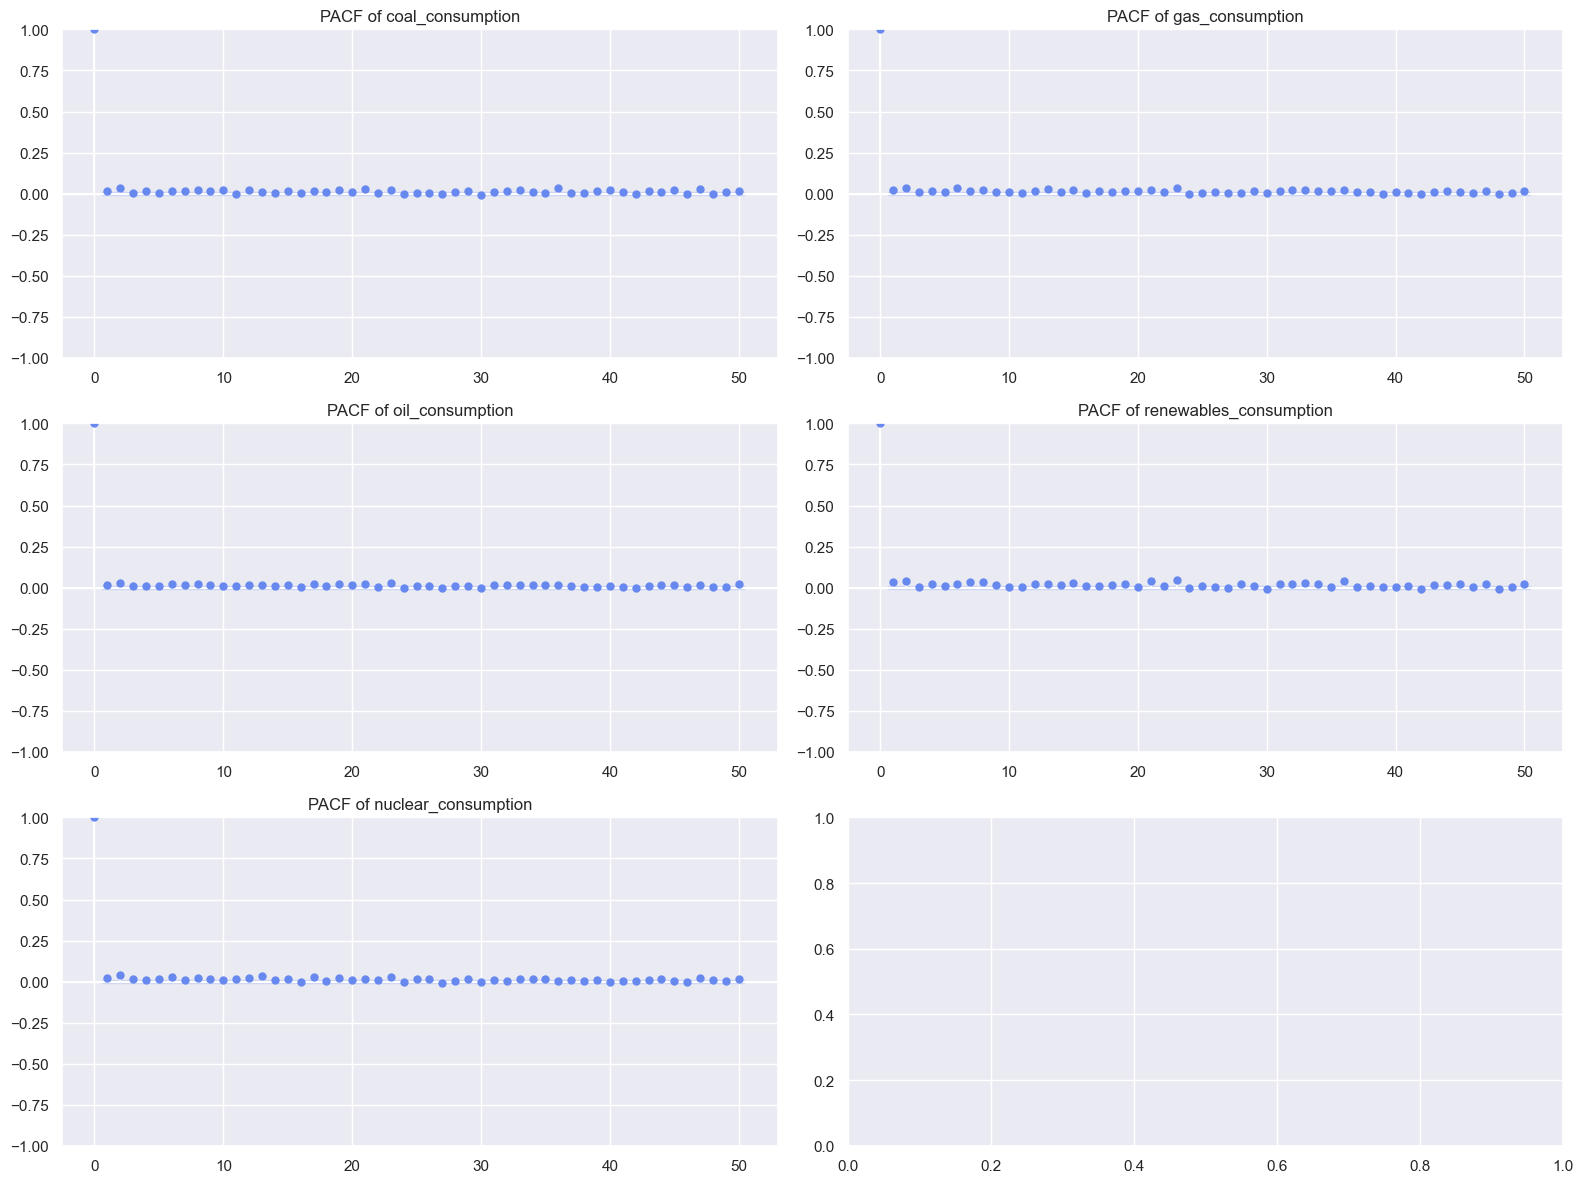

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

time_df = eda_copy_df.copy()
print(time_df.columns)
energy_sources = ['coal_consumption', 'gas_consumption', 'oil_consumption', 'renewables_consumption', 'nuclear_consumption']
time_df_selected = time_df[energy_sources]
print(time_df.index)
time_df_selected.plot(figsize=(14, 7), title="Energy Consumption Over Time")
plt.ylabel('Energy Consumption')
plt.xlabel('Year')
plt.show()
def adf_test(series, name=''):
    result = adfuller(series.dropna())
    print(f'ADF Statistic for {name}: {result[0]}')
    print(f'p-value for {name}: {result[1]}')
    if result[1] > 0.05:
        print(f'{name} is non-stationary.')
    else:
        print(f'{name} is stationary.')

for col in time_df_selected.columns:
    adf_test(time_df_selected[col], col)

for col in time_df_selected.columns:
    if adfuller(time_df_selected[col].dropna())[1] > 0.05:  
        time_df_selected[f'{col}_diff'] = time_df_selected[col].diff().dropna()

fig, axes = plt.subplots(3, 2, figsize=(16, 12))
for i, col in enumerate(time_df_selected.columns):
    ax = axes[i//2, i%2]
    plot_acf(time_df_selected[col].dropna(), lags=50, ax=ax)
    ax.set_title(f'ACF of {col}')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(3, 2, figsize=(16, 12))
for i, col in enumerate(time_df_selected.columns):
    ax = axes[i//2, i%2]
    plot_pacf(time_df_selected[col].dropna(), lags=50, ax=ax)
    ax.set_title(f'PACF of {col}')
plt.tight_layout()
plt.show()


MODEL BUILDING

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



546/546 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0021 - val_loss: 0.0079
Epoch 2/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0020 - val_loss: 0.0079
Epoch 3/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0021 - val_loss: 0.0079
Epoch 4/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0019 - val_loss: 0.0079
Epoch 5/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0019 - val_loss: 0.0079
Epoch 6/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0021 - val_loss: 0.0079
Epoch 7/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0016 - val_loss: 0.0078
Epoch 8/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0016 - val_loss: 0.0079
Epoch 9/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0020 - val_loss: 0.0078
Epoch 10/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0021 - val_loss: 0.0079
Epoch 11/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0019 - val_loss: 0.0079
Epoch 12/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.

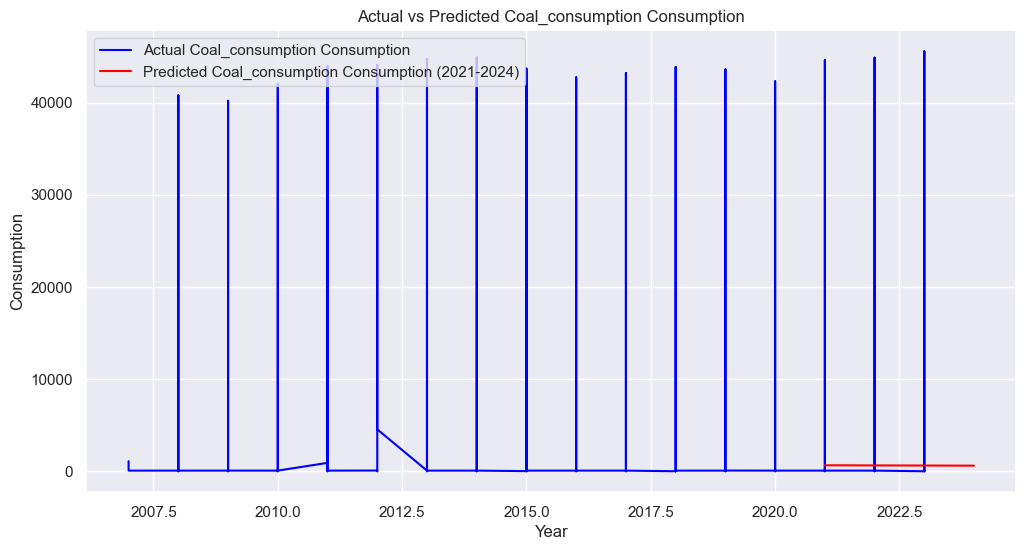

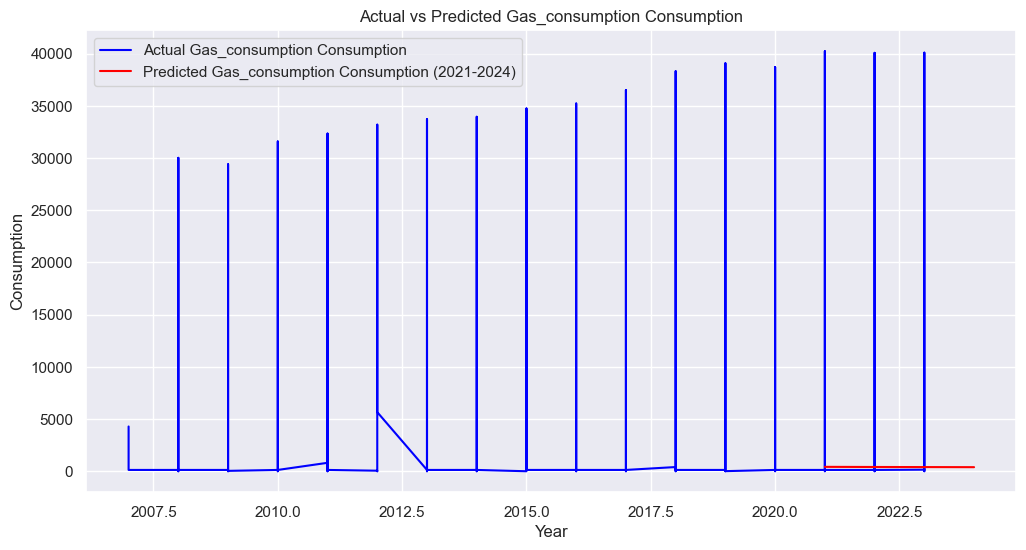

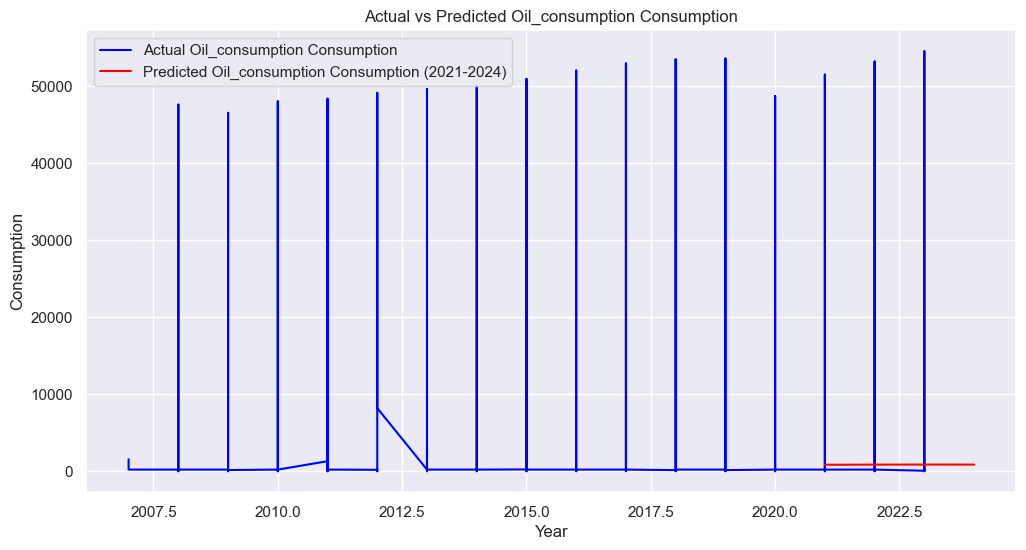

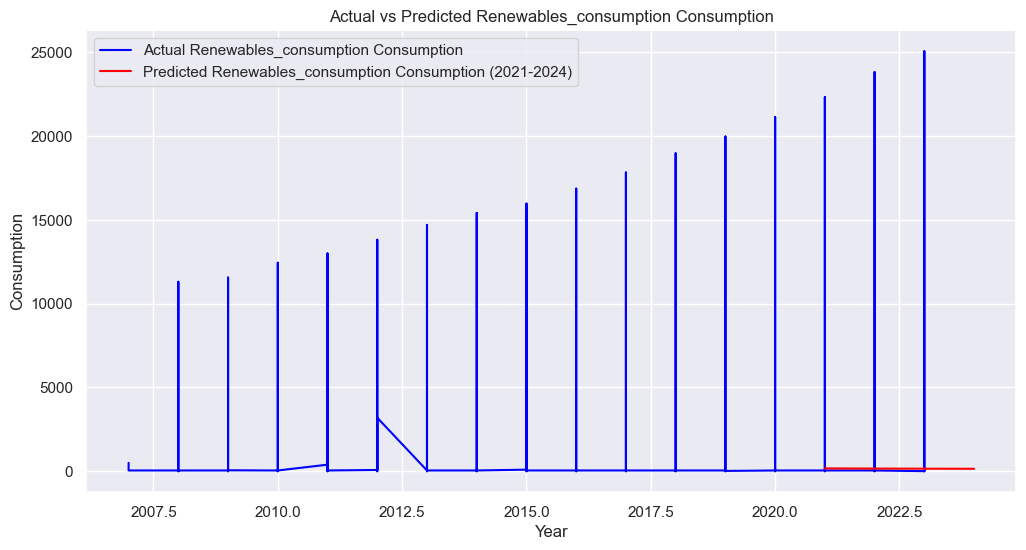

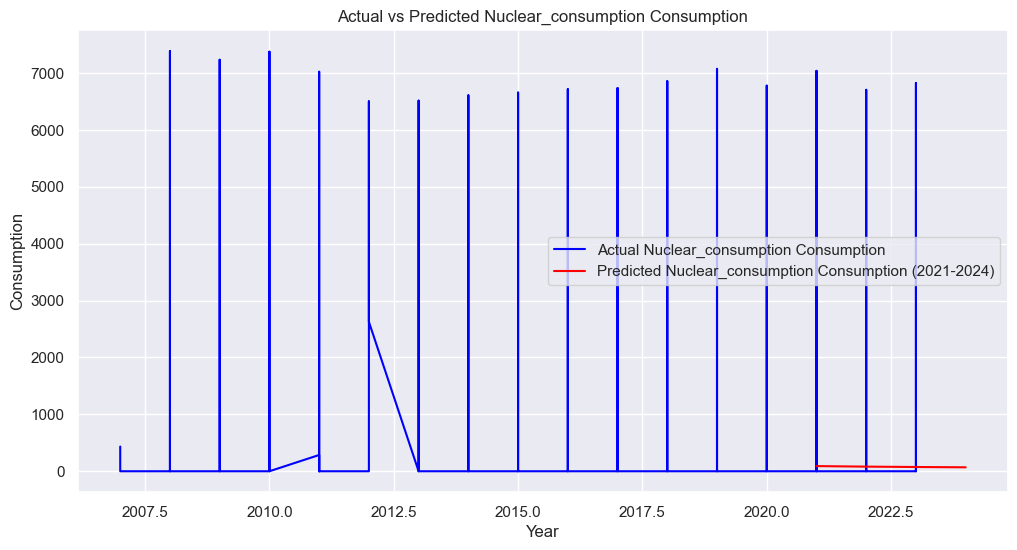

In [42]:
import numpy as np  
import pandas as pd  
from sklearn.preprocessing import MinMaxScaler  
from sklearn.model_selection import train_test_split  
from keras.models import Sequential  
from keras.layers import LSTM, Dense  
import matplotlib.pyplot as plt  
 
energy_sources = ['coal_consumption', 'gas_consumption', 'oil_consumption', 'renewables_consumption', 'nuclear_consumption']  
   
time_df = time_df.sort_index()  

scaler = MinMaxScaler(feature_range=(0, 1))  
scaled_data = scaler.fit_transform(time_df[energy_sources].values)  

def create_sequences(data, look_back=5):  
   sequences = []  
   targets = []  
    
   for i in range(len(data) - look_back):  
      sequences.append(data[i:i + look_back])   
      targets.append(data[i + look_back])   
    
   return np.array(sequences), np.array(targets)  
  
look_back = 5   
  

X, y = create_sequences(scaled_data, look_back)  
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)  
  
model = Sequential()  
model.add(LSTM(50, activation='relu', input_shape=(look_back, len(energy_sources))))  
model.add(Dense(len(energy_sources)))  
model.compile(optimizer='adam', loss='mean_squared_error')  
    
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)  
 
predictions = model.predict(X_test)  
 
predictions = scaler.inverse_transform(predictions)  
 
future_input = scaled_data[-look_back:].reshape(1, look_back, len(energy_sources))   
future_predictions = []  
  
for i in range(4):   
   future_prediction = model.predict(future_input)  
   future_predictions.append(future_prediction)  
  
   future_input = np.concatenate((future_input[:, 1:, :], future_prediction.reshape(1, 1, len(energy_sources))), axis=1)  

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(4, len(energy_sources)))  

future_years = np.arange(2021, 2025)  
 
for i, source in enumerate(energy_sources):  
   plt.figure(figsize=(12, 6))  
   plt.plot(time_df.index.values[-len(y_test):], scaler.inverse_transform(y_test)[:, i], label=f'Actual {source.capitalize()} Consumption', color='blue')  
   plt.plot(future_years, future_predictions[:, i], label=f'Predicted {source.capitalize()} Consumption (2021-2024)', color='red')  
   plt.title(f'Actual vs Predicted {source.capitalize()} Consumption')  
   plt.xlabel('Year')  
   plt.ylabel('Consumption')  
   plt.legend()  
   plt.show()

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 0.4600 - mae: 0.7832 - val_loss: 1.7584e-04 - val_mae: 0.0095 - learning_rate: 0.0010
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3190 - mae: 0.6415 - val_loss: 2.0606e-04 - val_mae: 0.0122 - learning_rate: 0.0010
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3782 - mae: 0.6986 - val_loss: 2.7625e-04 - val_mae: 0.0174 - learning_rate: 0.0010
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2430 - mae: 0.5507 - val_loss: 3.5454e-04 - val_mae: 0.0212 - learning_rate: 0.0010
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2292 - mae: 0.5142 - val_loss: 4.2895e-04 - val_mae: 0.0241 - learning_rate: 0.0010
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1555 - mae: 0.4077 - val_loss: 5.0388e-04 - val_mae: 0.0266 - learning_rate: 0.0010
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2280 - mae: 0.5090 - val_loss: 5.3257e-04 - val_mae: 0.0274 - learning_rate: 5.0000e-04

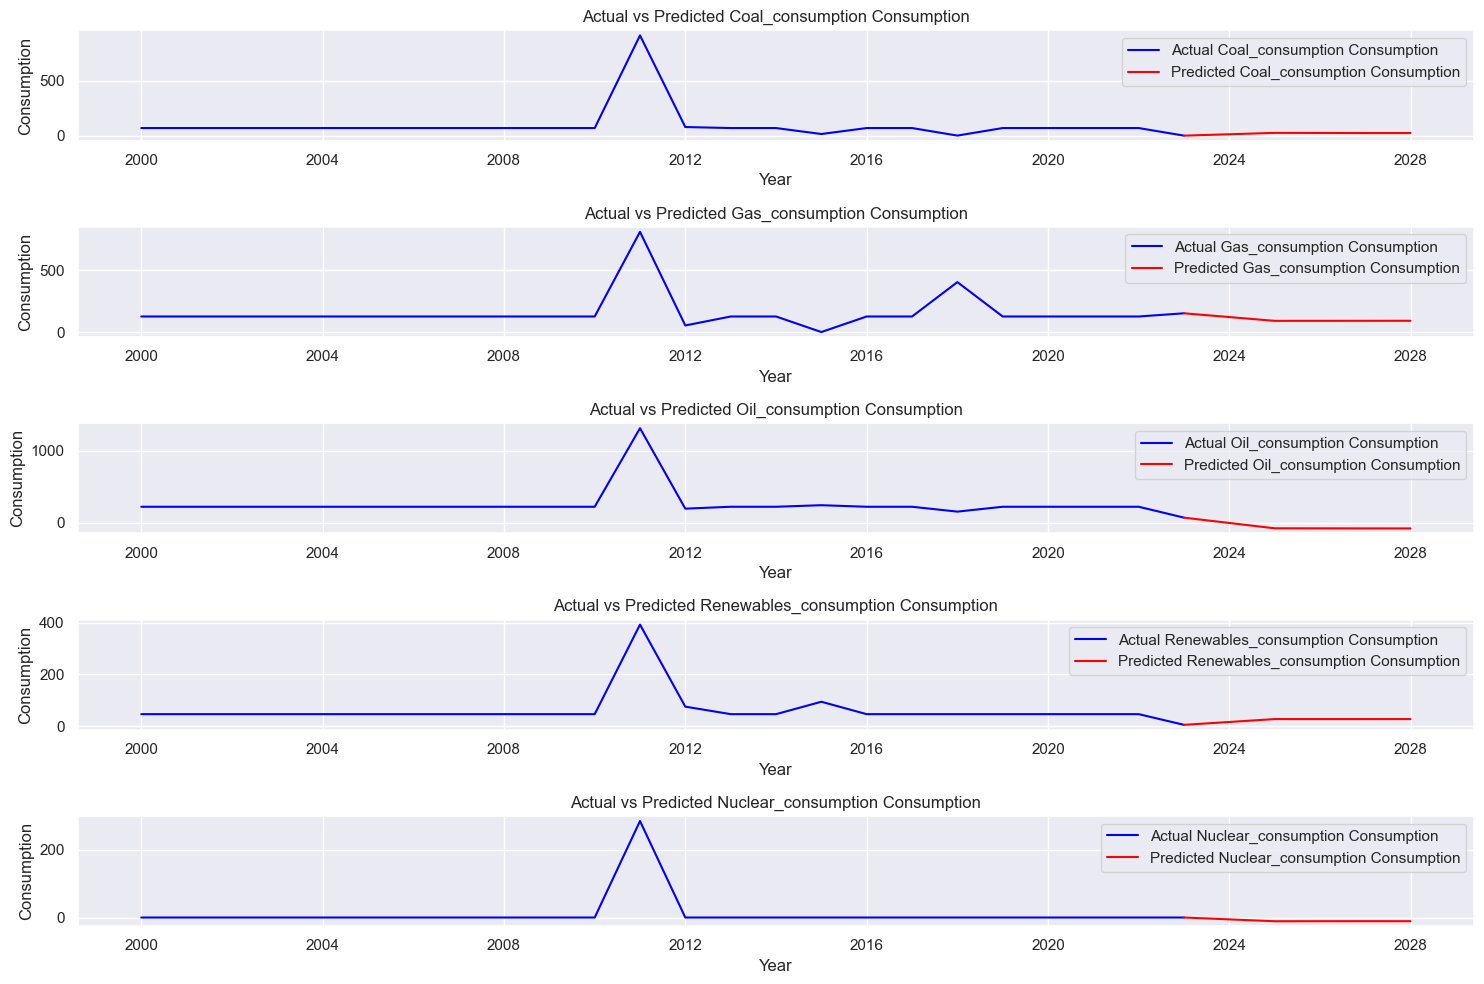


Future Predictions:
            coal_consumption  gas_consumption  oil_consumption  \
2024-12-31         25.131626        90.321075       -76.630302   
2025-12-31         24.363123        90.443489       -77.522446   
2026-12-31         23.639568        90.565544       -78.346016   
2027-12-31         23.682798        90.845444       -78.579002   

            renewables_consumption  nuclear_consumption  
2024-12-31               27.496826           -11.005499  
2025-12-31               27.494686           -10.896819  
2026-12-31               27.495926           -10.812288  
2027-12-31               27.535242           -10.886862  


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import Huber

def preprocess_dataframe(time_df, energy_sources):
  
    missing_columns = [col for col in energy_sources if col not in time_df.columns]
    if missing_columns:
        raise ValueError(f"Missing columns: {missing_columns}")
    
    if not pd.api.types.is_datetime64_any_dtype(time_df.index):
        try:
            time_df.index = pd.to_datetime(time_df.index, format='%Y')
        except Exception as e:
            print(f"Could not convert index to datetime: {e}")
            raise

    time_df = time_df.sort_index()
    time_df = time_df[~time_df.index.duplicated(keep='first')]
   
    time_df = time_df.dropna(subset=energy_sources)
    
    return time_df

def build_advanced_lstm_model(input_shape, units=64, dropout_rate=0.3):
   
    model = Sequential([
        
        LSTM(units, 
             activation='tanh', 
             return_sequences=True, 
             input_shape=input_shape,
             recurrent_dropout=dropout_rate),
        BatchNormalization(),
        Dropout(dropout_rate),
        

        LSTM(units // 2, 
             activation='tanh',
             recurrent_dropout=dropout_rate),
        BatchNormalization(),
        Dropout(dropout_rate),
        
        Dense(units // 2, activation='relu'),
        Dropout(dropout_rate),
        Dense(input_shape[1])  
    ])
    
  
    optimizer = Adam(learning_rate=0.001)
    
    model.compile(optimizer=optimizer, 
                  loss=Huber(delta=1.0), 
                  metrics=['mae'])
    
    return model

def prepare_sequences(data, look_back=5):
    
    sequences = []
    targets = []
    
    for i in range(len(data) - look_back):
        sequences.append(data[i:i + look_back])
        targets.append(data[i + look_back])
    
    return np.array(sequences), np.array(targets)

def train_lstm_model(X_train, y_train, X_test, y_test, input_shape):
    
    model = build_advanced_lstm_model(input_shape)
  
    early_stopping = EarlyStopping(
        monitor='val_loss', 
        patience=10, 
        restore_best_weights=True,
        min_delta=0.0001
    )
    
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.5, 
        patience=5, 
        min_lr=0.00001
    )
   
    history = model.fit(
        X_train, y_train, 
        epochs=100,  
        batch_size=32, 
        validation_data=(X_test, y_test),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )
    
    return model, history

def main(time_df, energy_sources):
    
    time_df = preprocess_dataframe(time_df, energy_sources)
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(time_df[energy_sources].values)
    
    look_back = 5
    X, y = prepare_sequences(scaled_data, look_back)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    model, history = train_lstm_model(X_train, y_train, X_test, y_test, input_shape=(look_back, len(energy_sources)))
    
    return model, scaler, X_test, y_test, time_df, scaled_data, look_back, history

def predict_and_visualize(model, scaler, X_test, y_test, time_df, scaled_data, energy_sources, look_back):
    
    last_year = time_df.index.max().year
    
    future_years = pd.date_range(start=str(last_year + 1), periods=4, freq='Y')

    predictions = model.predict(X_test)
    
    predictions = scaler.inverse_transform(predictions)
    
    future_input = scaled_data[-look_back:].reshape(1, look_back, len(energy_sources))   
    future_predictions = []
    
    for i in range(4):   
        future_prediction = model.predict(future_input)
        future_predictions.append(future_prediction)
    
        future_input = np.concatenate((future_input[:, 1:, :], future_prediction.reshape(1, 1, len(energy_sources))), axis=1)
    
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(4, len(energy_sources)))
    
    plt.figure(figsize=(15, 10))

    for i, source in enumerate(energy_sources):
        plt.subplot(len(energy_sources), 1, i+1)
        
        plt.plot(time_df.index.values[-len(X_test):], 
                 scaler.inverse_transform(y_test)[:, i], 
                 label=f'Actual {source.capitalize()} Consumption', 
                 color='blue')
 
        last_actual_year = time_df.index.values[-len(X_test):].max()
        future_x = np.concatenate([
            [last_actual_year], 
            future_years
        ])
        future_y = np.concatenate([
            [scaler.inverse_transform(y_test)[:, i][-1]], 
            future_predictions[:, i]
        ])
        
        plt.plot(future_x, future_y, 
                 label=f'Predicted {source.capitalize()} Consumption', 
                 color='red', 
                 linestyle='-')
        
        plt.title(f'Actual vs Predicted {source.capitalize()} Consumption')
        plt.xlabel('Year')
        plt.ylabel('Consumption')
        plt.legend()

    plt.tight_layout()
    plt.show()
    
    future_predictions_df = pd.DataFrame(
        future_predictions, 
        columns=energy_sources, 
        index=future_years
    )
    
    return predictions, future_predictions, future_predictions_df

def run_energy_prediction(time_df):
    
    try:
    
        energy_sources = ['coal_consumption', 'gas_consumption', 'oil_consumption', 'renewables_consumption', 'nuclear_consumption']
        
        model, scaler, X_test, y_test, time_df, scaled_data, look_back, history = main(time_df, energy_sources)

        predictions, future_predictions, future_predictions_df = predict_and_visualize(
            model, scaler, X_test, y_test, time_df, scaled_data, 
            energy_sources, look_back
        )
  
        return {
            'model': model,
            'scaler': scaler,
            'predictions': predictions,
            'future_predictions': future_predictions,
            'future_predictions_df': future_predictions_df,
            'history': history
        }
    
    except Exception as e:
        print(f"An error occurred during energy prediction: {e}")
        raise

if __name__ == '__main__':

    results = run_energy_prediction(time_df)

    print("\nFuture Predictions:")
    print(results['future_predictions_df'])

Epoch 1/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0019 - val_loss: 0.0079
Epoch 2/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0021 - val_loss: 0.0078
Epoch 3/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0023 - val_loss: 0.0079
Epoch 4/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0018 - val_loss: 0.0080
Epoch 5/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0020 - val_loss: 0.0078
Epoch 6/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0021 - val_loss: 0.0080
Epoch 7/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0021 - val_loss: 0.0079
Epoch 8/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0022 - val_loss: 0.0079
Epoch 9/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0022 - val_loss: 0.0079
Epoch 10/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0019 - val_loss: 0.0079
Epoch 11/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0020 - val_loss: 0.0079
Epoch 12/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

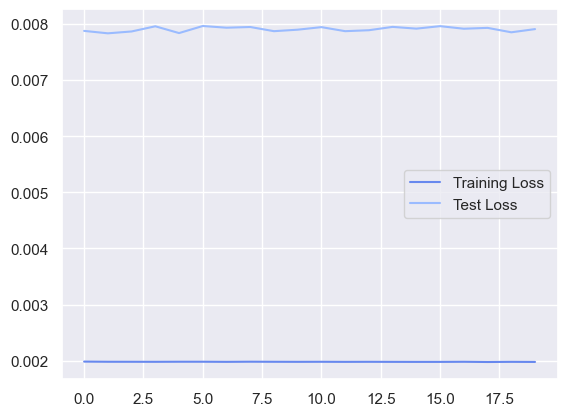

In [43]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)  
  
plt.plot(history.history['loss'], label='Training Loss')  
plt.plot(history.history['val_loss'], label='Test Loss')  
plt.legend()  
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

rf_pred = rf_model.predict(X_test.reshape(X_test.shape[0], -1))

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R-squared: {rf_r2}")

Random Forest MSE: 5499.400270816727
Random Forest R-squared: 0.9972376663711051


Regularization

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,               
    max_depth=10,                    
    min_samples_split=10,            
    min_samples_leaf=5,              
    max_features='sqrt',         
    random_state=42
)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R-squared: {rf_r2}")

Random Forest MSE: 34023.65290368206
Random Forest R-squared: 0.982910012734947


In [ ]:
from sklearn.model_selection import cross_val_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-cv_scores.mean()}")

Cross-validated MSE: 79260.84810487817


In [ ]:
train_r2 = model.score(X_train.reshape(X_train.shape[0], -1), y_train)
print(f"Training R-squared: {train_r2}")

test_r2 = r2_score(y_test, y_pred)
print(f"Test R-squared: {test_r2}")

Training R-squared: 0.9996765885441117
Test R-squared: 0.9972376663711051


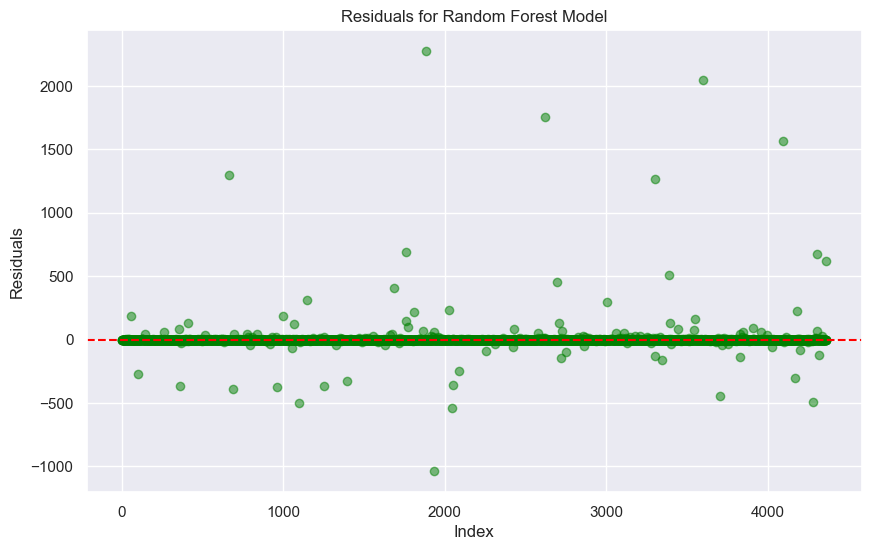

In [ ]:
rf_residuals = y_test - rf_pred

plt.figure(figsize=(10, 6))
plt.scatter(range(len(rf_residuals)), rf_residuals, color='green', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals for Random Forest Model')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

In [ ]:
import xgboost as xgb

xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

xg_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

xg_pred = xg_model.predict(X_test.reshape(X_test.shape[0], -1))

xg_mse = mean_squared_error(y_test, xg_pred)
xg_r2 = r2_score(y_test, xg_pred)

print(f"XGBoost MSE: {xg_mse}")
print(f"XGBoost R-squared: {xg_r2}")


XGBoost MSE: 25660.20808978085
XGBoost R-squared: 0.9871109480597392


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

xg_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

xg_pred = xg_model.predict(X_test.reshape(X_test.shape[0], -1))

xg_train_pred = xg_model.predict(X_train.reshape(X_train.shape[0], -1))

xg_mse = mean_squared_error(y_test, xg_pred)
xg_r2_test = r2_score(y_test, xg_pred)
xg_r2_train = r2_score(y_train, xg_train_pred)

print(f"XGBoost MSE: {xg_mse}")
print(f"XGBoost Test R-squared: {xg_r2_test}")
print(f"XGBoost Training R-squared: {xg_r2_train}")

XGBoost MSE: 25660.20808978085
XGBoost Test R-squared: 0.9871109480597392
XGBoost Training R-squared: 0.9999537781992811


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

xg_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,               
    max_depth=6,                     
    learning_rate=0.01,             
    subsample=0.8,                   
    colsample_bytree=0.8,            
    reg_lambda=1,                   
    alpha=0.5,                      
    random_state=42
)

xg_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

xg_pred = xg_model.predict(X_test.reshape(X_test.shape[0], -1))

xg_mse = mean_squared_error(y_test, xg_pred)
xg_r2 = r2_score(y_test, xg_pred)

print(f"XGBoost MSE: {xg_mse}")
print(f"XGBoost R-squared: {xg_r2}")

XGBoost MSE: 373485.5850665128
XGBoost R-squared: 0.8123992179635482


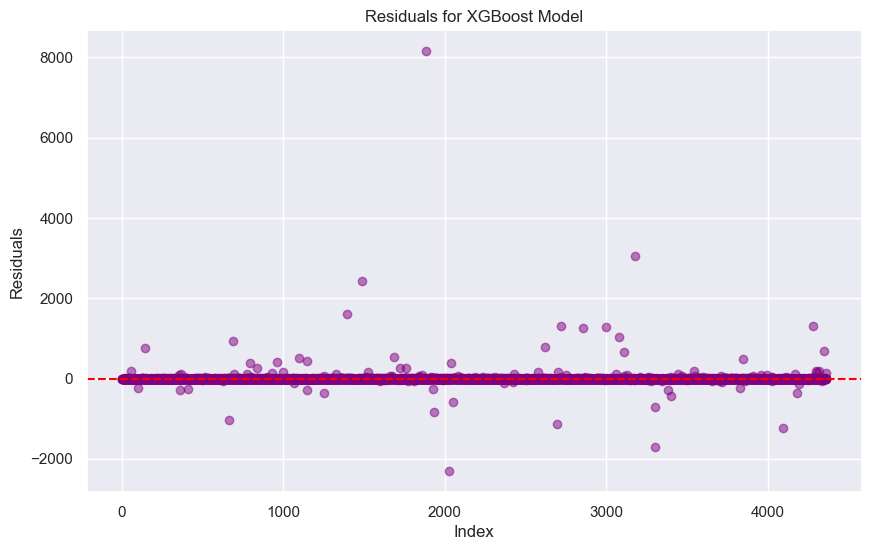

In [ ]:
xg_residuals = y_test - xg_pred

plt.figure(figsize=(10, 6))
plt.scatter(range(len(xg_residuals)), xg_residuals, color='purple', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals for XGBoost Model')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()
